# ADME Data Analysis Script

## Key Features
1. Loads 5 ADME Properties:
  - Cell permeability (Caco2_Wang)
  - Intestinal absorption (HIA_Hou)
  - Bioavailability (Bioavailability_Ma)  
  - Fat solubility (Lipophilicity_AstraZeneca)
  - Water solubility (Solubility_AqSolDB)

2. Analyzes Each Property:
  - Basic statistics
  - Missing values check
  - Distribution plot
  - SMILES examples

3. Cross-Property Analysis:
  - Correlation matrix
  - Shared compounds
  - Visual heatmap


Downloading...


Loading datasets from TDC...


100%|██████████| 82.5k/82.5k [00:00<00:00, 1.49MiB/s]
Loading...
Done!
Downloading...


Loaded Caco2_Wang dataset with shape: (910, 3)


100%|██████████| 40.1k/40.1k [00:00<00:00, 689kiB/s]
Loading...
Done!
Downloading...


Loaded HIA_Hou dataset with shape: (578, 3)


100%|██████████| 43.7k/43.7k [00:00<00:00, 873kiB/s]
Loading...
Done!
Downloading...


Loaded Bioavailability_Ma dataset with shape: (640, 3)


100%|██████████| 298k/298k [00:00<00:00, 5.60MiB/s]
Loading...
Done!
Downloading...


Loaded Lipophilicity_AstraZeneca dataset with shape: (4200, 3)


100%|██████████| 853k/853k [00:00<00:00, 11.5MiB/s]
Loading...
Done!


Loaded Solubility_AqSolDB dataset with shape: (9982, 3)

Analysis for Caco2_Wang
--------------------------------------------------

Basic Statistics:
count    910.000000
mean      -5.239498
std        0.777236
min       -7.760000
25%       -5.777444
50%       -5.131224
75%       -4.641339
max       -3.510000
Name: Y, dtype: float64

Missing Values:
Drug_ID    0
Drug       0
Y          0
dtype: int64


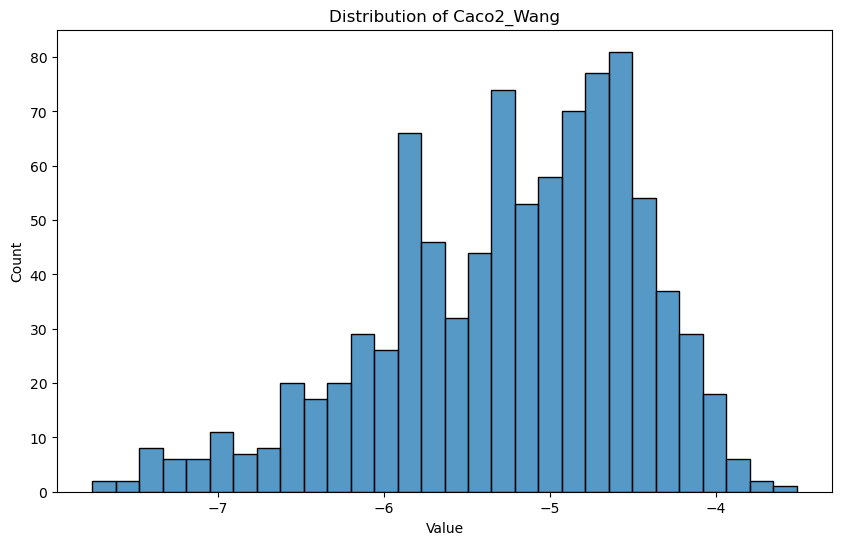


SMILES string example:
Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2

Analysis for HIA_Hou
--------------------------------------------------

Basic Statistics:
count    578.000000
mean       0.865052
std        0.341964
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Y, dtype: float64

Missing Values:
Drug_ID    0
Drug       0
Y          0
dtype: int64


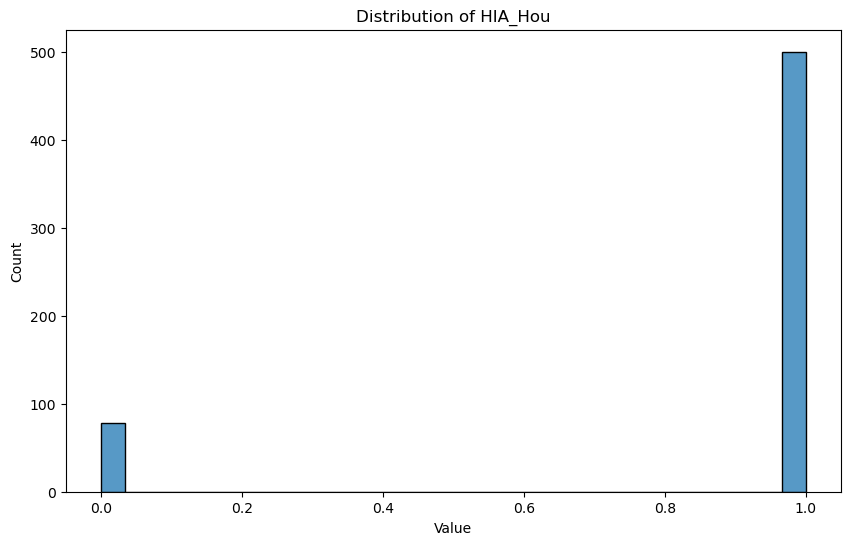


SMILES string example:
CC(=O)Nc1ccccc1

Analysis for Bioavailability_Ma
--------------------------------------------------

Basic Statistics:
count    640.000000
mean       0.768750
std        0.421962
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Y, dtype: float64

Missing Values:
Drug_ID    0
Drug       0
Y          0
dtype: int64


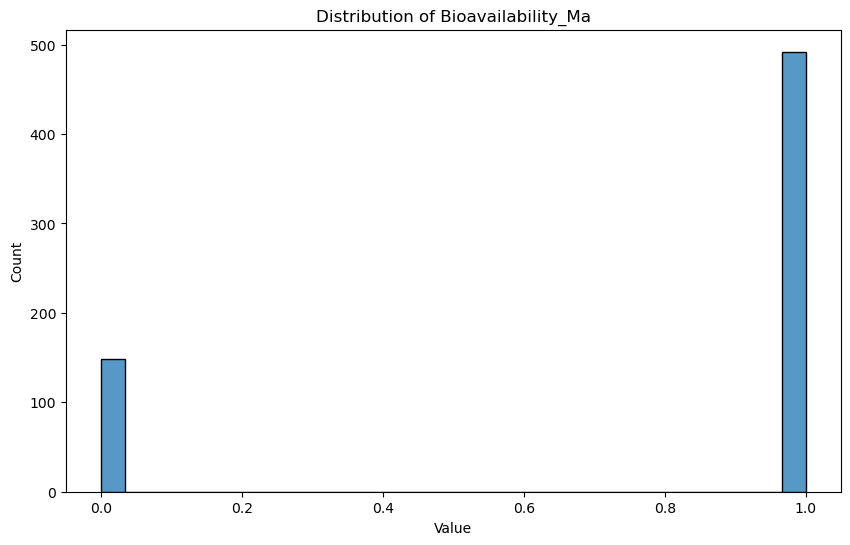


SMILES string example:
OCC(S)CS

Analysis for Lipophilicity_AstraZeneca
--------------------------------------------------

Basic Statistics:
count    4200.000000
mean        2.186336
std         1.203004
min        -1.500000
25%         1.410000
50%         2.360000
75%         3.100000
max         4.500000
Name: Y, dtype: float64

Missing Values:
Drug_ID    0
Drug       0
Y          0
dtype: int64


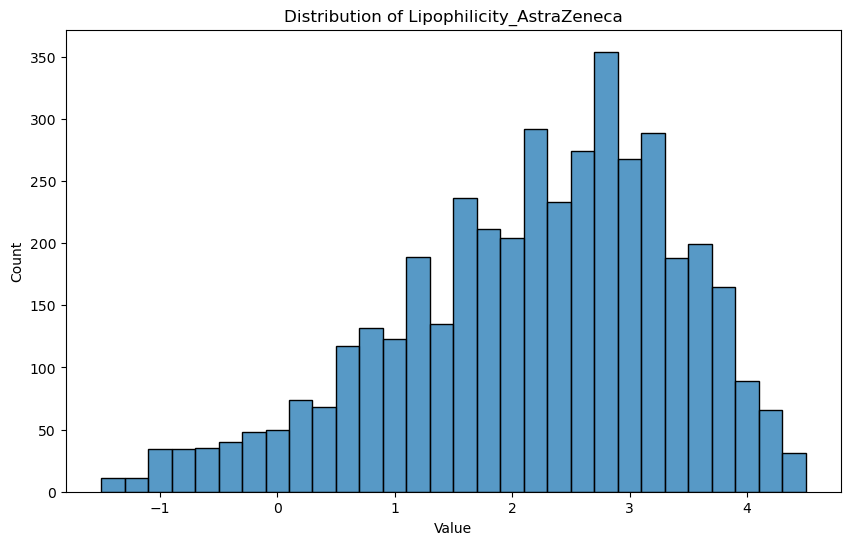


SMILES string example:
Cn1c(CN2CCN(c3ccc(Cl)cc3)CC2)nc2ccccc21

Analysis for Solubility_AqSolDB
--------------------------------------------------

Basic Statistics:
count    9982.000000
mean       -2.889909
std         2.368154
min       -13.171900
25%        -4.326325
50%        -2.618173
75%        -1.209735
max         2.137682
Name: Y, dtype: float64

Missing Values:
Drug_ID    0
Drug       0
Y          0
dtype: int64


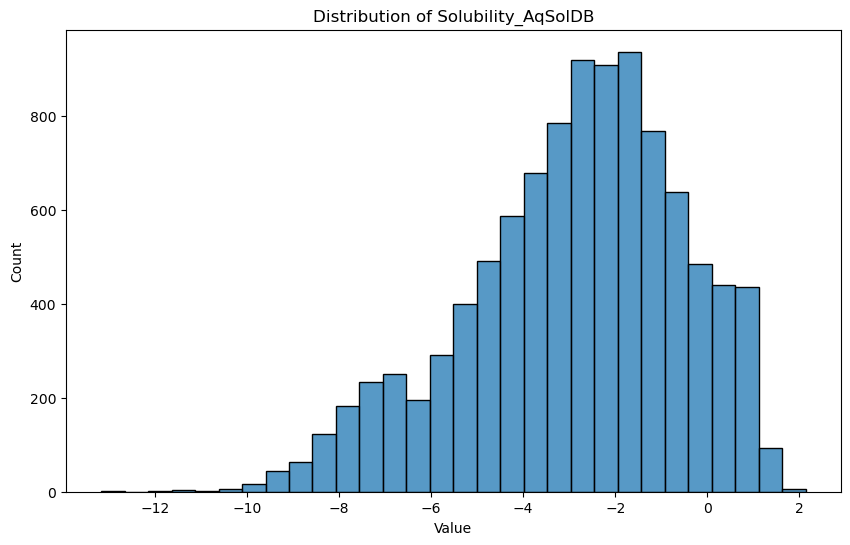


SMILES string example:
CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Br-]

Analyzing correlations between properties...


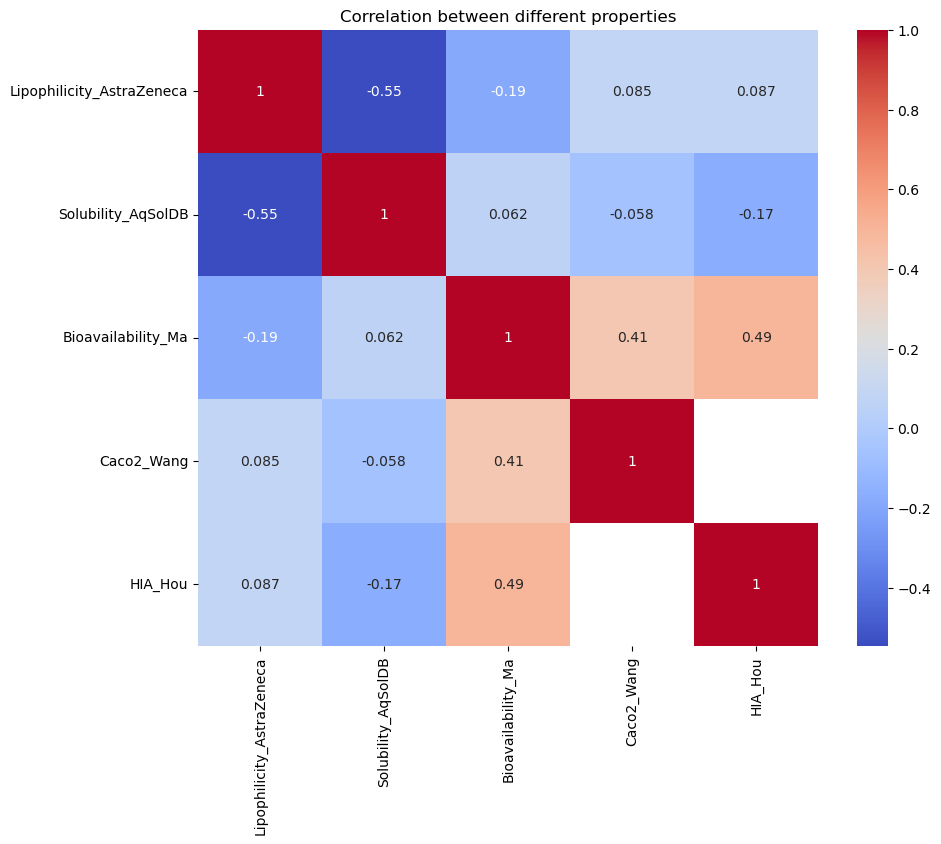

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tdc.single_pred import ADME
from tdc.utils import retrieve_dataset_names

def load_adme_data():
    """
    Load relevant ADME datasets from TDC
    Returns a dictionary of dataframes
    """
    # List of relevant ADME properties for drug delivery
    properties = ['Caco2_Wang', 'HIA_Hou', 'Bioavailability_Ma', 
                 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
    
    data_dict = {}
    for prop in properties:
        try:
            data = ADME(name = prop)
            data_dict[prop] = data.get_data()
            print(f"Loaded {prop} dataset with shape: {data_dict[prop].shape}")
        except:
            print(f"Could not load {prop}")
    
    return data_dict

def analyze_dataset(df, property_name):
    """
    Perform basic analysis on each dataset
    """
    print(f"\nAnalysis for {property_name}")
    print("-" * 50)
    
    # Basic statistics
    print("\nBasic Statistics:")
    print(df['Y'].describe())
    
    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Create distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Y', bins=30)
    plt.title(f'Distribution of {property_name}')
    plt.xlabel('Value')
    plt.show()
    
    # If we have SMILES, analyze molecule properties
    if 'Drug' in df.columns and isinstance(df['Drug'].iloc[0], str):
        print("\nSMILES string example:")
        print(df['Drug'].iloc[0])

def analyze_correlations(data_dict):
    """
    Analyze correlations between different properties
    for compounds that appear in multiple datasets
    """
    # Create a merged dataset
    merged_data = {}
    
    # Get all unique SMILES
    all_smiles = set()
    for prop, df in data_dict.items():
        all_smiles.update(df['Drug'].unique())
    
    # For each SMILES, get all properties
    for smiles in all_smiles:
        merged_data[smiles] = {}
        for prop, df in data_dict.items():
            if smiles in df['Drug'].values:
                merged_data[smiles][prop] = df[df['Drug'] == smiles]['Y'].iloc[0]
    
    # Convert to DataFrame
    merged_df = pd.DataFrame.from_dict(merged_data, orient='index')
    
    # Create correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation between different properties')
    plt.show()
    
    return merged_df

def main():
    # Load data
    print("Loading datasets from TDC...")
    data_dict = load_adme_data()
    
    # Analyze each dataset
    for prop, df in data_dict.items():
        analyze_dataset(df, prop)
    
    # Analyze correlations
    print("\nAnalyzing correlations between properties...")
    merged_df = analyze_correlations(data_dict)
    
    return data_dict, merged_df

if __name__ == "__main__":
    data_dict, merged_df = main()

1. Caco2_Wang Distribution
- Shows roughly normal distribution with slight right skew
- Represents Caco-2 cell permeability predictions (log scale)
- Distribution suggests most compounds have moderate permeability

2. HIA_Hou Distribution
- ~ 500 counts at 1.0
- ~75 counts at 0.0 
- Much more well-absorbed compounds (1.0) >> Poorly absorbed compounds (0.0)

3. Bioavailability_Ma Distribution
- Much more high bioavailability (1.0) ~500 compounds >> low bioavailability (0.0) ~150 compounds

4. Lipophilicity_AstraZeneca Distribution
- Majority fall within expected drug-like lipophilicity range

5. Solubility_AqSolDB Distribution
- Distribution indicates most compounds have moderate to low aqueous solubility

The strongest relationship is between lipophilicity and solubility, which aligns with physical chemistry principles

# Drug Analysis Code Documentation

## Overview
A comprehensive drug property analysis system using molecular descriptors, implemented through two main classes:
- `DrugDataPreprocessor`: Data loading and preprocessing
- `DrugDescriptorAnalyzer`: Statistical analysis on molecular descriptors

## Class Structure

### DrugDataPreprocessor
Initializes with ADME properties from TDC:
- Caco2_Wang (Permeability)
- HIA_Hou (Absorption)
- Bioavailability_Ma (Bioavailability)
- Lipophilicity_AstraZeneca (Lipophilicity)
- Solubility_AqSolDB (Solubility)

### DrugDescriptorAnalyzer
Analyzes processed data through multiple visualization methods:

#### 1. Property Distribution Analysis
- Classification Tasks:
 - Pie charts for class proportions
 - Bar plots for class counts
 - Imbalance detection (>3:1 ratio)
- Regression Tasks:
 - Histograms with distribution metrics
 - Normality and skewness analysis
 - Outlier detection

#### 2. Descriptor Distributions
- Visualization:
 - Multi-subplot descriptor views
 - KDE plots (classification)
 - Histograms (regression)
 - Skewness metrics
- Analysis:
 - Distribution patterns
 - Transformation needs
 - Feature engineering insights

#### 3. Descriptor Correlations
- Visualization:
 - Top 10 correlation bar plots
 - Color-coded correlation direction
 - Numerical correlation values
- Analysis:
 - Predictor strength
 - Chemical relationship validation
 - Descriptor redundancy
 - Feature selection guidance

#### 4. Descriptor Relationships
- Classification Analysis:
 - Box plots by class
 - Point-biserial correlations
 - Class separation assessment
- Regression Analysis:
 - Scatter plots with trend lines
 - Pearson correlations
 - Relationship quality metrics

#### 5. Outlier Analysis
- Tools:
 - Violin plots for descriptors
 - IQR-based outlier detection
 - Summary statistics
- Focus Areas:
 - Outlier quantification
 - Distribution assessment
 - Data quality verification
 - Preprocessing strategy

## Error Handling System
- SMILES validation
- Process error tracking
- Missing data management
- Progress monitoring and reporting

## Key Features
- Comprehensive molecular descriptor calculation
- Multi-level statistical analysis
- Automated visualization generation
- Robust error handling
- Detailed progress reporting

In [1]:
import pandas as pd
import numpy as np
from tdc.single_pred import ADME
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class DrugDataPreprocessor:
    def __init__(self):
        """Initialize the preprocessor with all needed properties"""
        self.properties = {
            'Caco2_Wang': ADME(name='Caco2_Wang'),
            'HIA_Hou': ADME(name='HIA_Hou'),
            'Bioavailability_Ma': ADME(name='Bioavailability_Ma'),
            'Lipophilicity_AstraZeneca': ADME(name='Lipophilicity_AstraZeneca'),
            'Solubility_AqSolDB': ADME(name='Solubility_AqSolDB')
        }
        self.processed_data = {}
        
    def load_raw_data(self):
        """Load raw data from TDC for each property"""
        raw_data = {}
        for name, dataset in self.properties.items():
            data = dataset.get_data()
            print(f"{name}: {len(data)} compounds")
            print(f"Columns: {data.columns}")
            print(f"Sample data:\n{data.head()}\n")
            raw_data[name] = data
        return raw_data
    
    def check_smiles_validity(self, data, property_name):
        """Check SMILES validity and report issues"""
        valid_mols = []
        invalid_smiles = []
        
        for smiles in data['Drug']:
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                invalid_smiles.append(smiles)
            else:
                valid_mols.append(mol)
        
        print(f"\n{property_name} SMILES Analysis:")
        print(f"Total compounds: {len(data)}")
        print(f"Valid SMILES: {len(valid_mols)}")
        print(f"Invalid SMILES: {len(invalid_smiles)}")
        
        return valid_mols, invalid_smiles
    
    def calculate_molecular_features(self, smiles):
        """Calculate molecular descriptors for a single SMILES string"""
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        
        features = {}
        
        # Basic molecular properties
        features['MolWeight'] = Descriptors.ExactMolWt(mol)
        features['LogP'] = Descriptors.MolLogP(mol)
        features['NumRotatableBonds'] = Descriptors.NumRotatableBonds(mol)
        features['NumHAcceptors'] = Descriptors.NumHAcceptors(mol)
        features['NumHDonors'] = Descriptors.NumHDonors(mol)
        features['TPSA'] = Descriptors.TPSA(mol)
        features['NumRings'] = Descriptors.RingCount(mol)
        features['NumAromatic'] = sum(1 for ring in mol.GetRingInfo().AtomRings() 
                                    if all(mol.GetAtomWithIdx(i).GetIsAromatic() for i in ring))
        
        # Calculate Morgan fingerprint
        morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
        morgan_features = list(morgan_fp.ToBitString())
        for i, bit in enumerate(morgan_features):
            features[f'Morgan_{i}'] = int(bit)
        
        return features
    
    def process_dataset(self, data, property_name):
        """Process a single dataset"""
        print(f"\nProcessing {property_name}...")
        
        processed_rows = []
        skipped_smiles = []
        
        for idx, row in data.iterrows():
            features = self.calculate_molecular_features(row['Drug'])
            if features is not None:
                features['SMILES'] = row['Drug']
                features['Property_Value'] = row['Y']
                processed_rows.append(features)
            else:
                skipped_smiles.append(row['Drug'])
        
        processed_df = pd.DataFrame(processed_rows)
        
        print(f"Processed compounds: {len(processed_df)}")
        print(f"Skipped compounds: {len(skipped_smiles)}")
        
        return processed_df, skipped_smiles
    
    def analyze_property_distribution(self, data, property_name):
        """Analyze property distribution based on task type"""
        is_classification = len(data['Property_Value'].unique()) <= 2
        
        if is_classification:
            self._analyze_classification_data(data, property_name)
        else:
            plt.figure(figsize=(10, 6))
            sns.histplot(data=data, x='Property_Value', bins=30)
            plt.title(f'{property_name} Distribution')
            plt.xlabel('Property Value')
            plt.ylabel('Count')
            plt.show()
            
            print(f"\n{property_name} Statistics:")
            print(data['Property_Value'].describe())
    
    def _analyze_classification_data(self, data, property_name):
        """Analyze classification data distribution"""
        plt.figure(figsize=(12, 4))
        
        # Pie chart
        plt.subplot(1, 2, 1)
        class_counts = data['Property_Value'].value_counts()
        plt.pie(class_counts, labels=['Negative', 'Positive'], 
                autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
        plt.title(f'{property_name} Class Distribution')
        
        # Bar plot
        plt.subplot(1, 2, 2)
        sns.countplot(data=data, x='Property_Value', 
                     palette=['lightcoral', 'lightgreen'])
        plt.title(f'{property_name} Class Counts')
        plt.xlabel('Class')
        plt.xticks([0, 1], ['Negative', 'Positive'])
        for i, v in enumerate(class_counts):
            plt.text(i, v, str(v), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print("\nClass Distribution Summary:")
        print(f"Total samples: {len(data)}")
        print("\nClass counts:")
        print(class_counts)
        print("\nClass proportions:")
        print(class_counts / len(data))
        
        # Check imbalance
        minority_class = min(class_counts)
        majority_class = max(class_counts)
        imbalance_ratio = majority_class / minority_class
        print(f"\nImbalance ratio (majority:minority): {imbalance_ratio:.2f}")
        
        if imbalance_ratio > 3:
            print("Note: Dataset shows significant class imbalance (ratio > 3:1)")
            print("Consider using:")
            print("- Class weights")
            print("- SMOTE or other sampling techniques")
            print("- Balanced accuracy metrics")
    
    def preprocess_all_data(self):
        raw_data = self.load_raw_data()
        print("Starting properties:", list(raw_data.keys()))
        
        for property_name, data in raw_data.items():
            try:
                print(f"\nStarting to process {property_name}")
                print("Step 1: Checking SMILES")
                valid_mols, invalid_smiles = self.check_smiles_validity(data, property_name)
                
                print("Step 2: Processing dataset")
                processed_df, skipped_smiles = self.process_dataset(data, property_name)
                
                print("Step 3: Analyzing distribution")
                self.analyze_property_distribution(processed_df, property_name)
                
                print("Step 4: Storing results")
                self.processed_data[property_name] = processed_df
                
                print(f"Successfully processed {property_name}")
            except Exception as e:
                print(f"Error processing {property_name}: {str(e)}")
                
        print("Final properties:", list(self.processed_data.keys()))
        return self.processed_data

class DrugDescriptorAnalyzer:
    def __init__(self, processed_data):
        """Initialize analyzer with processed data"""
        self.processed_data = processed_data
        self.descriptor_columns = self._get_descriptor_columns()
        self.task_types = self._identify_task_types()
    
    def _get_descriptor_columns(self):
        """Get descriptor columns"""
        sample_df = next(iter(self.processed_data.values()))
        return [col for col in sample_df.columns 
                if col not in ['SMILES', 'Property_Value'] 
                and not col.startswith('Morgan_')]
    
    def _identify_task_types(self):
        """Identify task types (classification/regression)"""
        task_types = {}
        for name, data in self.processed_data.items():
            unique_values = data['Property_Value'].unique()
            task_types[name] = 'classification' if len(unique_values) <= 2 else 'regression'
        return task_types
    
    def analyze_descriptor_distributions(self):
        """Analyze descriptor distributions"""
        for property_name, data in self.processed_data.items():
            print(f"\nAnalyzing descriptors for {property_name}")
            
            n_descriptors = len(self.descriptor_columns)
            n_rows = (n_descriptors + 2) // 3
            
            fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
            fig.suptitle(f'Descriptor Distributions for {property_name}')
            axes = axes.flatten()
            
            for i, descriptor in enumerate(self.descriptor_columns):
                if self.task_types[property_name] == 'classification':
                    sns.kdeplot(data=data, x=descriptor, hue='Property_Value', 
                              ax=axes[i], common_norm=False)
                else:
                    sns.histplot(data=data, x=descriptor, ax=axes[i])
                
                axes[i].set_title(f'{descriptor}\nSkew: {stats.skew(data[descriptor]):.2f}')
                axes[i].set_xlabel(descriptor)
                
                print(f"\n{descriptor} statistics:")
                print(data[descriptor].describe())
            
            for j in range(i+1, len(axes)):
                axes[j].set_visible(False)
            
            plt.tight_layout()
            plt.show()
    
    def analyze_descriptor_correlations(self):
        """Analyze correlations between descriptors and target property only"""
        for property_name, data in self.processed_data.items():
            print(f"\nAnalyzing descriptor correlations for {property_name}")
            
            # Calculate correlations
            if self.task_types[property_name] == 'classification':
                correlations = []
                for descriptor in self.descriptor_columns:
                    corr, _ = stats.pointbiserialr(data['Property_Value'], data[descriptor])
                    correlations.append({
                        'Descriptor': descriptor,
                        'Correlation': corr if not np.isnan(corr) else 0
                    })
            else:
                correlations = []
                for descriptor in self.descriptor_columns:
                    corr = data[descriptor].corr(data['Property_Value'])
                    correlations.append({
                        'Descriptor': descriptor,
                        'Correlation': corr if not np.isnan(corr) else 0
                    })
            
            # Create and sort correlation DataFrame
            correlations_df = pd.DataFrame(correlations)
            correlations_df['Abs_Correlation'] = correlations_df['Correlation'].abs()
            correlations_df = correlations_df.sort_values('Abs_Correlation', ascending=False)
            
            # Plot top correlations as bar plot
            plt.figure(figsize=(10, 6))
            top_10 = correlations_df.head(10)
            colors = ['blue' if x >= 0 else 'red' for x in top_10['Correlation']]
            plt.barh(y=top_10['Descriptor'], width=top_10['Correlation'], color=colors)
            plt.title(f'Top 10 Descriptor Correlations with {property_name}')
            plt.xlabel('Correlation Coefficient')
            plt.ylabel('Descriptor')
            
            # Add correlation values as text
            for i, v in enumerate(top_10['Correlation']):
                plt.text(v + (0.01 if v >= 0 else -0.01), 
                        i, 
                        f'{v:.3f}', 
                        va='center',
                        ha='left' if v >= 0 else 'right')
            
            plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
            plt.tight_layout()
            plt.show()
            
            print("\nTop correlations:")
            print(correlations_df.head(10))
    
    def plot_descriptor_relationships(self):
        """Plot descriptor relationships"""
        for property_name, data in self.processed_data.items():
            if self.task_types[property_name] == 'classification':
                correlations = []
                for descriptor in self.descriptor_columns:
                    corr, _ = stats.pointbiserialr(data['Property_Value'], data[descriptor])
                    correlations.append((descriptor, abs(corr) if not np.isnan(corr) else 0))
            else:
                correlations = []
                for descriptor in self.descriptor_columns:
                    corr = data[descriptor].corr(data['Property_Value'])
                    correlations.append((descriptor, abs(corr) if not np.isnan(corr) else 0))
            
            top_descriptors = sorted(correlations, key=lambda x: x[1], reverse=True)[:5]
            
            fig, axes = plt.subplots(2, 3, figsize=(15, 10))
            fig.suptitle(f'Top Descriptor Relationships - {property_name}')
            axes = axes.flatten()
            
            for i, (descriptor, corr) in enumerate(top_descriptors):
                if self.task_types[property_name] == 'classification':
                    sns.boxplot(data=data, x='Property_Value', y=descriptor, ax=axes[i])
                    axes[i].set_title(f'{descriptor}\nPoint Biserial: {corr:.2f}')
                else:
                    sns.regplot(data=data, x=descriptor, y='Property_Value', 
                              ax=axes[i], scatter_kws={'alpha':0.5})
                    axes[i].set_title(f'{descriptor}\nCorr: {corr:.2f}')
            
            axes[-1].set_visible(False)
            plt.tight_layout()
            plt.show()
    
    def analyze_outliers(self):
        """Analyze outliers (regression only)"""
        for property_name, data in self.processed_data.items():
            if self.task_types[property_name] == 'classification':
                print(f"\nSkipping outlier analysis for {property_name} (classification task)")
                continue
            
            print(f"\nAnalyzing outliers for {property_name}")
            outliers_summary = []
            
            for descriptor in self.descriptor_columns:
                Q1 = data[descriptor].quantile(0.25)
                Q3 = data[descriptor].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                outliers = data[(data[descriptor] < lower_bound) | 
                              (data[descriptor] > upper_bound)]
                
                outliers_summary.append({
                    'Descriptor': descriptor,
                    'Outliers_Count': len(outliers),
                    'Outliers_Percentage': (len(outliers) / len(data)) * 100
                })
            
            # Violin plots
            plt.figure(figsize=(12, 6))
            sns.violinplot(data=data[self.descriptor_columns])
            plt.xticks(rotation=45, ha='right')
            plt.title(f'Descriptor Distributions - {property_name}')
            plt.tight_layout()
            plt.show()
            
            print("\nOutliers summary:")
            print(pd.DataFrame(outliers_summary))

def analyze_data(processed_data):
    """Convenience function to run all analyses"""
    analyzer = DrugDescriptorAnalyzer(processed_data)
    
    print("Analyzing descriptor distributions...")
    analyzer.analyze_descriptor_distributions()
    
    print("\nAnalyzing descriptor correlations...")
    analyzer.analyze_descriptor_correlations()
    
    print("\nPlotting descriptor relationships...")
    analyzer.plot_descriptor_relationships()
    
    print("\nAnalyzing outliers...")
    analyzer.analyze_outliers()

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


Caco2_Wang: 910 compounds
Columns: Index(['Drug_ID', 'Drug', 'Y'], dtype='object')
Sample data:
                                             Drug_ID  \
0                                    (-)-epicatechin   
1  (2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...   
2                                            codeine   
3                                         creatinine   
4                                            danazol   

                                                Drug         Y  
0            Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2 -6.220000  
1                   C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C -3.860000  
2  COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2... -4.090000  
3                                     CN1CC(=O)NC1=N -5.935409  
4  C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(... -4.840000  

HIA_Hou: 578 compounds
Columns: Index(['Drug_ID', 'Drug', 'Y'], dtype='object')
Sample data:
             Drug_ID                                               Drug  Y
0       

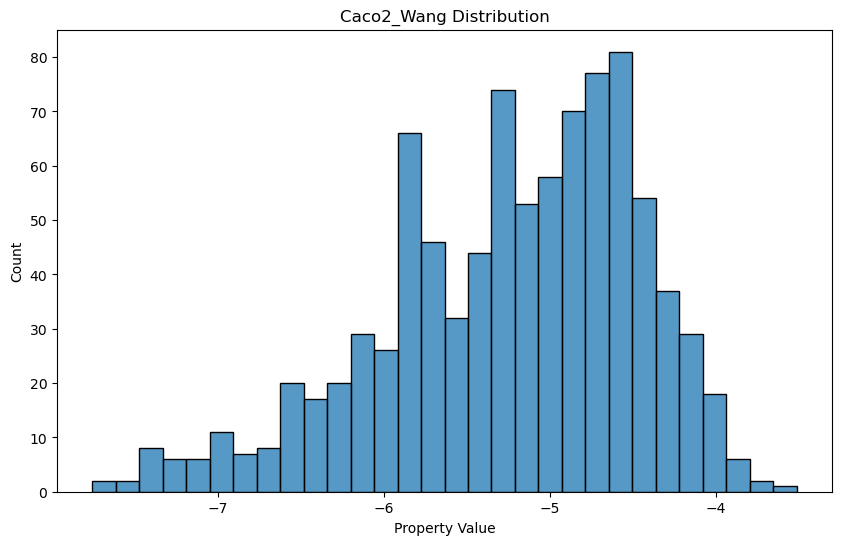


Caco2_Wang Statistics:
count    910.000000
mean      -5.239498
std        0.777236
min       -7.760000
25%       -5.777444
50%       -5.131224
75%       -4.641339
max       -3.510000
Name: Property_Value, dtype: float64
Step 4: Storing results
Successfully processed Caco2_Wang

Starting to process HIA_Hou
Step 1: Checking SMILES

HIA_Hou SMILES Analysis:
Total compounds: 578
Valid SMILES: 578
Invalid SMILES: 0
Step 2: Processing dataset

Processing HIA_Hou...
Processed compounds: 578
Skipped compounds: 0
Step 3: Analyzing distribution


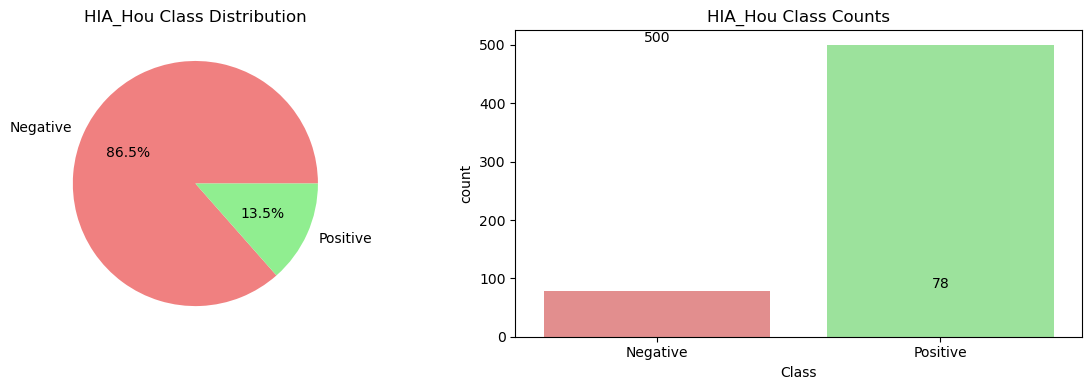


Class Distribution Summary:
Total samples: 578

Class counts:
Property_Value
1    500
0     78
Name: count, dtype: int64

Class proportions:
Property_Value
1    0.865052
0    0.134948
Name: count, dtype: float64

Imbalance ratio (majority:minority): 6.41
Note: Dataset shows significant class imbalance (ratio > 3:1)
Consider using:
- Class weights
- SMOTE or other sampling techniques
- Balanced accuracy metrics
Step 4: Storing results
Successfully processed HIA_Hou

Starting to process Bioavailability_Ma
Step 1: Checking SMILES

Bioavailability_Ma SMILES Analysis:
Total compounds: 640
Valid SMILES: 640
Invalid SMILES: 0
Step 2: Processing dataset

Processing Bioavailability_Ma...
Processed compounds: 640
Skipped compounds: 0
Step 3: Analyzing distribution


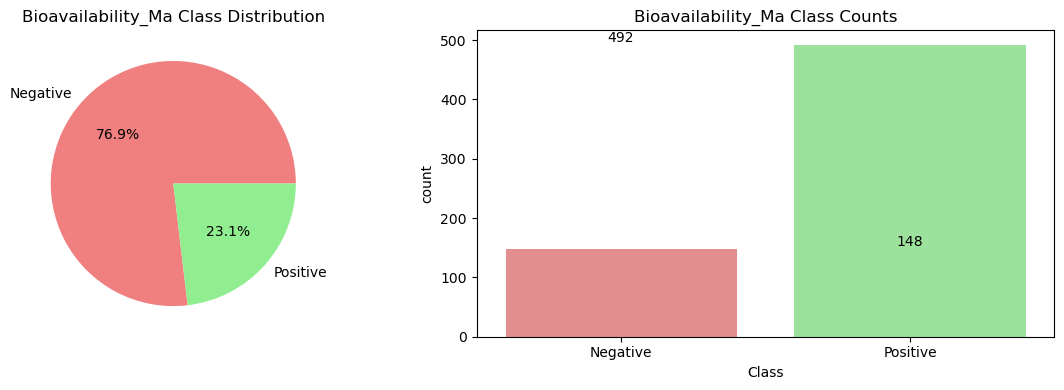


Class Distribution Summary:
Total samples: 640

Class counts:
Property_Value
1    492
0    148
Name: count, dtype: int64

Class proportions:
Property_Value
1    0.76875
0    0.23125
Name: count, dtype: float64

Imbalance ratio (majority:minority): 3.32
Note: Dataset shows significant class imbalance (ratio > 3:1)
Consider using:
- Class weights
- SMOTE or other sampling techniques
- Balanced accuracy metrics
Step 4: Storing results
Successfully processed Bioavailability_Ma

Starting to process Lipophilicity_AstraZeneca
Step 1: Checking SMILES

Lipophilicity_AstraZeneca SMILES Analysis:
Total compounds: 4200
Valid SMILES: 4200
Invalid SMILES: 0
Step 2: Processing dataset

Processing Lipophilicity_AstraZeneca...
Processed compounds: 4200
Skipped compounds: 0
Step 3: Analyzing distribution


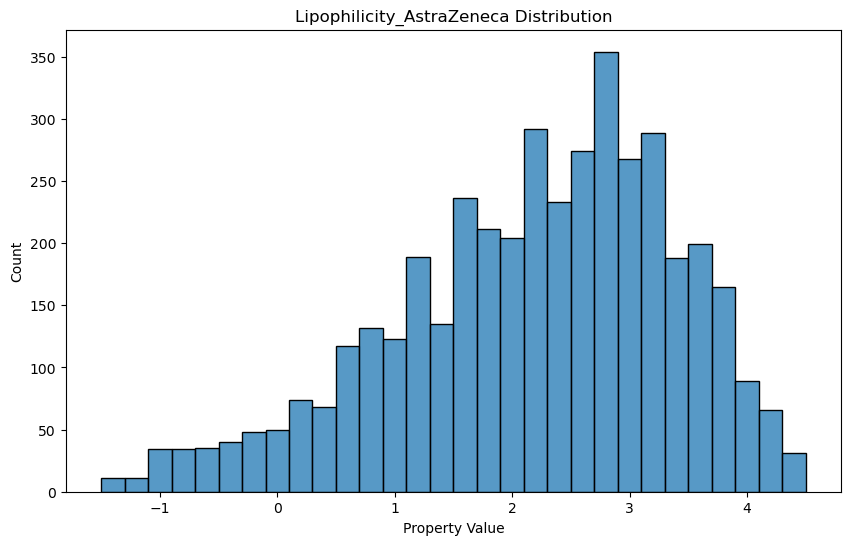


Lipophilicity_AstraZeneca Statistics:
count    4200.000000
mean        2.186336
std         1.203004
min        -1.500000
25%         1.410000
50%         2.360000
75%         3.100000
max         4.500000
Name: Property_Value, dtype: float64
Step 4: Storing results
Successfully processed Lipophilicity_AstraZeneca

Starting to process Solubility_AqSolDB
Step 1: Checking SMILES


[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not removing hydrogen atom without neighbors
[10:59:15] WARNING: not r


Solubility_AqSolDB SMILES Analysis:
Total compounds: 9982
Valid SMILES: 9982
Invalid SMILES: 0
Step 2: Processing dataset

Processing Solubility_AqSolDB...


[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:17] WARNING: not removing hydrogen atom without neighbors
[10:59:18] WARNING: not removing hydrogen atom without neighbors
[10:59:18] WARNING: not removing hydrogen atom without neighbors
[10:59:18] WARNING: not removing hydrogen atom without neighbors
[10:59:18] WARNING: not removing hydrogen atom without neighbors
[10:59:18] WARNING: not r

Processed compounds: 9982
Skipped compounds: 0
Step 3: Analyzing distribution


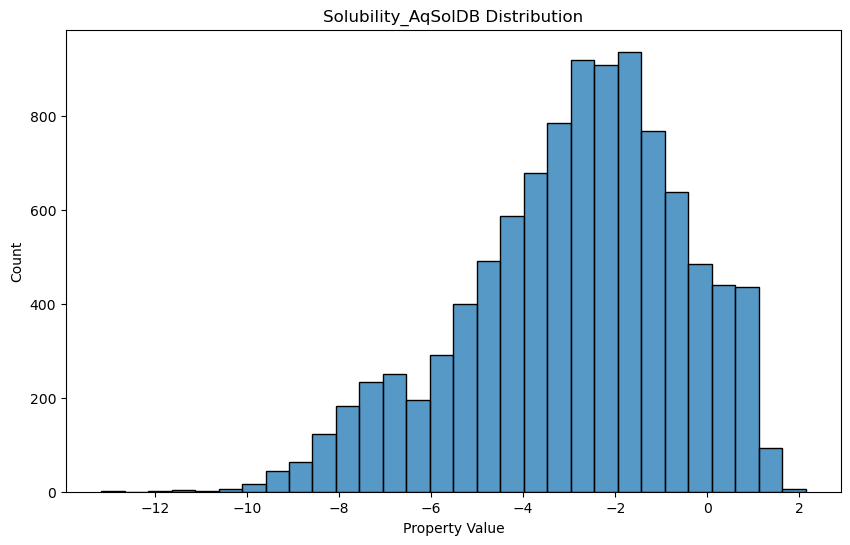


Solubility_AqSolDB Statistics:
count    9982.000000
mean       -2.889909
std         2.368154
min       -13.171900
25%        -4.326325
50%        -2.618173
75%        -1.209735
max         2.137682
Name: Property_Value, dtype: float64
Step 4: Storing results
Successfully processed Solubility_AqSolDB
Final properties: ['Caco2_Wang', 'HIA_Hou', 'Bioavailability_Ma', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
Analyzing descriptor distributions...

Analyzing descriptors for Caco2_Wang

MolWeight statistics:
count    910.000000
mean     414.306843
std      156.000892
min       32.026215
25%      307.214744
50%      400.136365
75%      514.329434
max      966.430789
Name: MolWeight, dtype: float64

LogP statistics:
count    910.000000
mean       2.130127
std        2.156939
min       -7.571400
25%        0.997125
50%        2.465750
75%        3.541850
max        8.687800
Name: LogP, dtype: float64

NumRotatableBonds statistics:
count    910.000000
mean       5.747253
std        3.

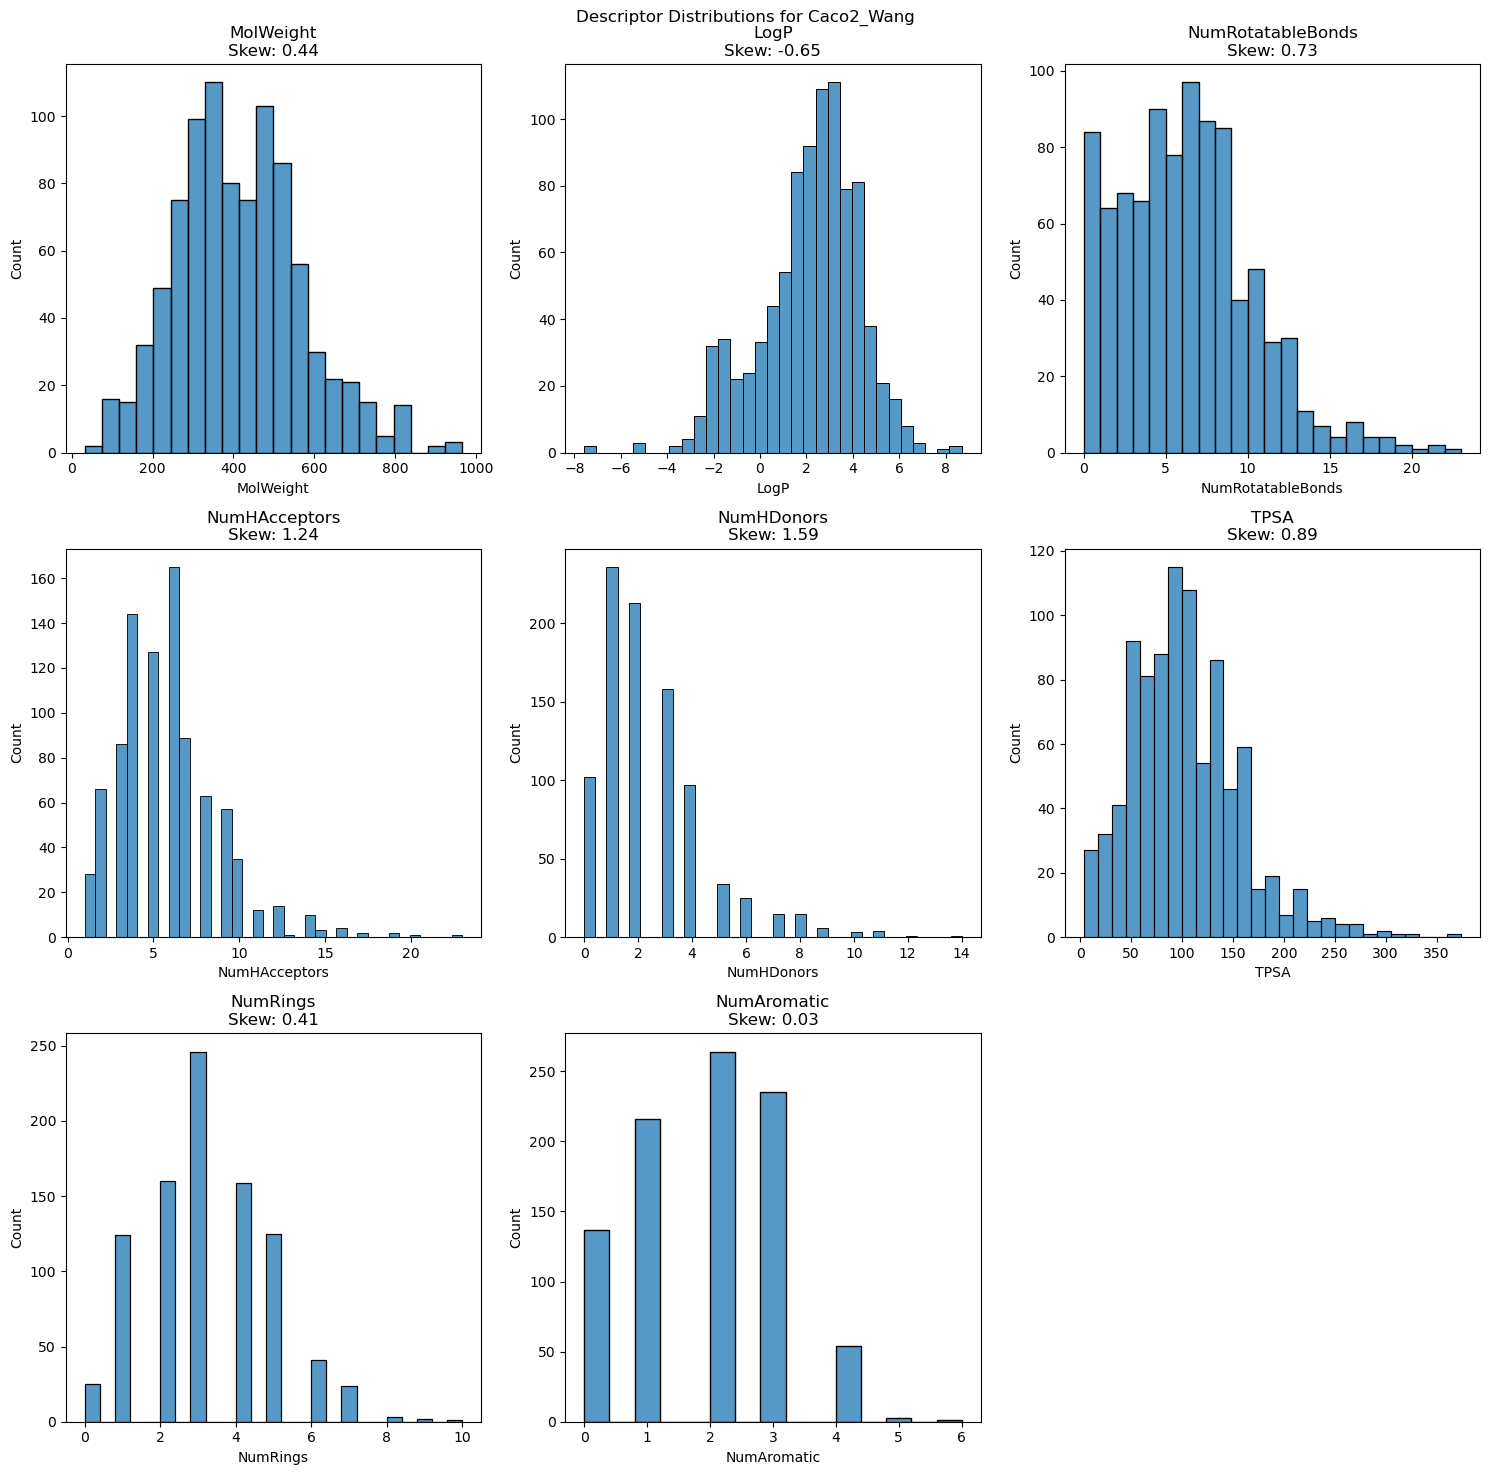


Analyzing descriptors for HIA_Hou

MolWeight statistics:
count     578.000000
mean      328.303288
std       131.816963
min        46.041865
25%       250.072337
50%       310.211473
75%       383.060788
max      1447.430200
Name: MolWeight, dtype: float64

LogP statistics:
count    578.000000
mean       2.208110
std        2.200805
min       -8.852800
25%        1.261525
50%        2.346450
75%        3.588025
max        9.029000
Name: LogP, dtype: float64

NumRotatableBonds statistics:
count    578.000000
mean       4.482699
std        3.223163
min        0.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       28.000000
Name: NumRotatableBonds, dtype: float64

NumHAcceptors statistics:
count    578.000000
mean       4.432526
std        2.968310
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max       25.000000
Name: NumHAcceptors, dtype: float64

NumHDonors statistics:
count    578.000000
mean       1.833910
std        2.114592

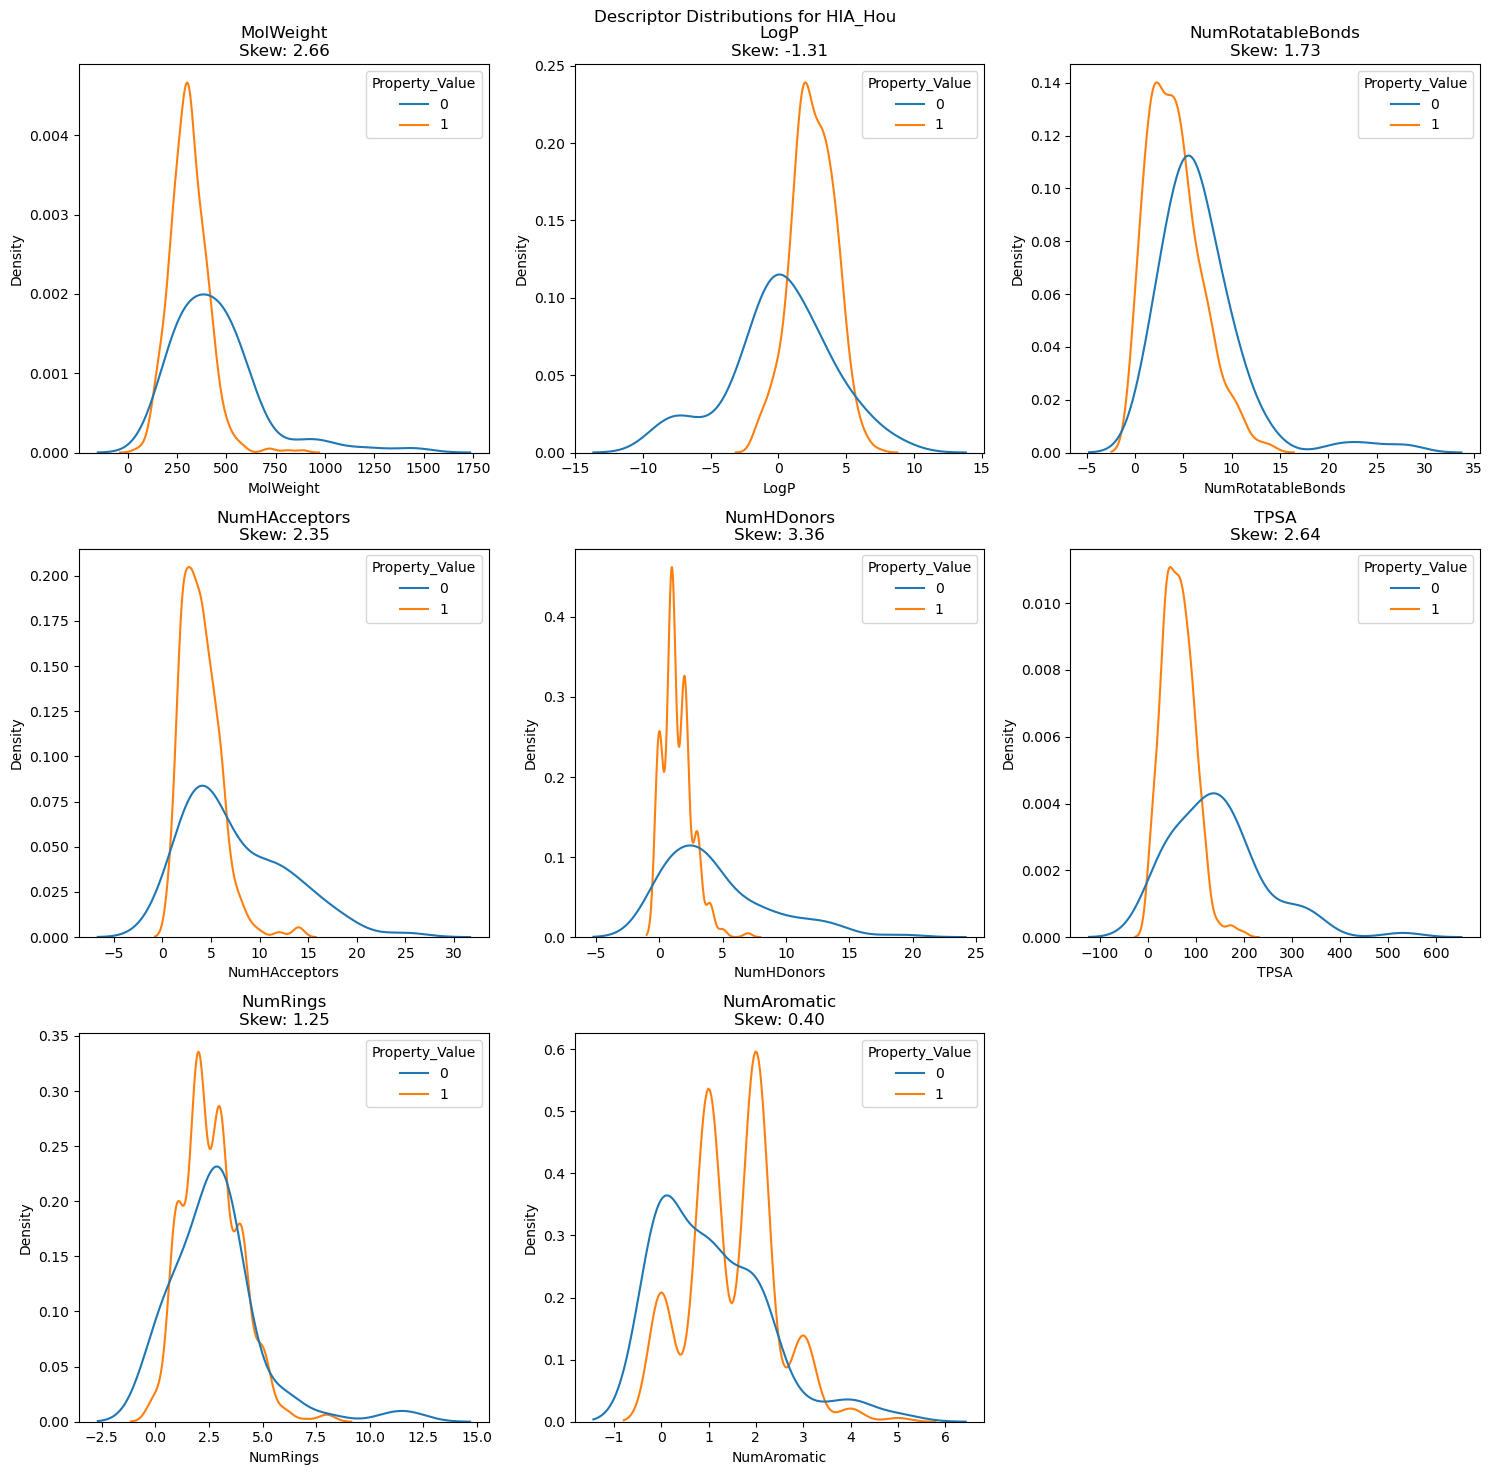


Analyzing descriptors for Bioavailability_Ma

MolWeight statistics:
count     640.000000
mean      345.428253
std       129.738958
min        46.041865
25%       262.917582
50%       325.677566
75%       403.449349
max      1018.440480
Name: MolWeight, dtype: float64

LogP statistics:
count    640.000000
mean       2.228650
std        2.165521
min       -8.861700
25%        1.194825
50%        2.432200
75%        3.574960
max        9.908300
Name: LogP, dtype: float64

NumRotatableBonds statistics:
count    640.000000
mean       4.743750
std        3.064251
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       17.000000
Name: NumRotatableBonds, dtype: float64

NumHAcceptors statistics:
count    640.000000
mean       4.910938
std        2.979829
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       19.000000
Name: NumHAcceptors, dtype: float64

NumHDonors statistics:
count    640.000000
mean       1.959375
std     

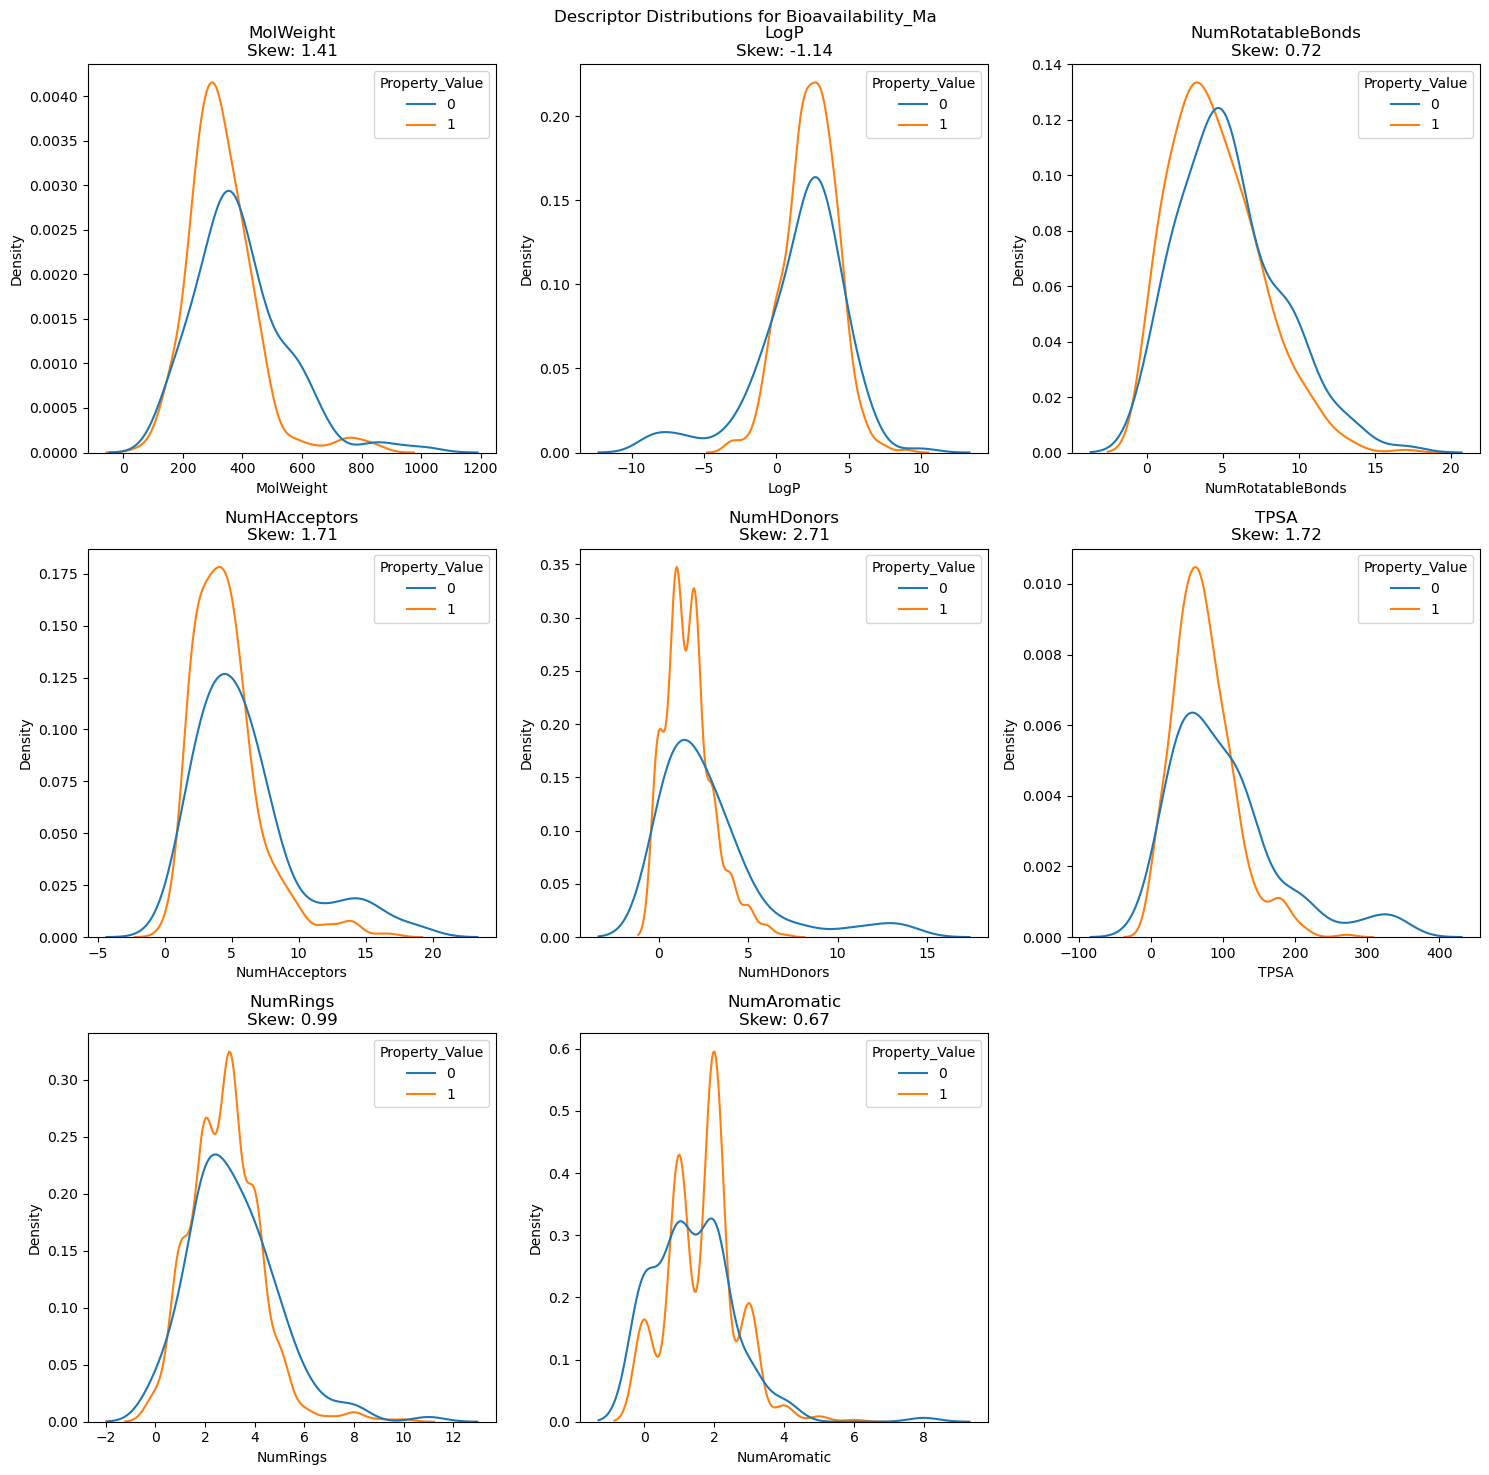


Analyzing descriptors for Lipophilicity_AstraZeneca

MolWeight statistics:
count    4200.000000
mean      382.687446
std       106.863628
min       113.084064
25%       306.178159
50%       388.111002
75%       456.187149
max      1619.710366
Name: MolWeight, dtype: float64

LogP statistics:
count    4200.000000
mean        3.280305
std         1.322797
min        -5.621800
25%         2.432380
50%         3.277700
75%         4.115325
max        10.342520
Name: LogP, dtype: float64

NumRotatableBonds statistics:
count    4200.000000
mean        5.215000
std         2.907188
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        35.000000
Name: NumRotatableBonds, dtype: float64

NumHAcceptors statistics:
count    4200.000000
mean        5.137857
std         2.158695
min         0.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        24.000000
Name: NumHAcceptors, dtype: float64

NumHDonors statistics:
count    4200.000

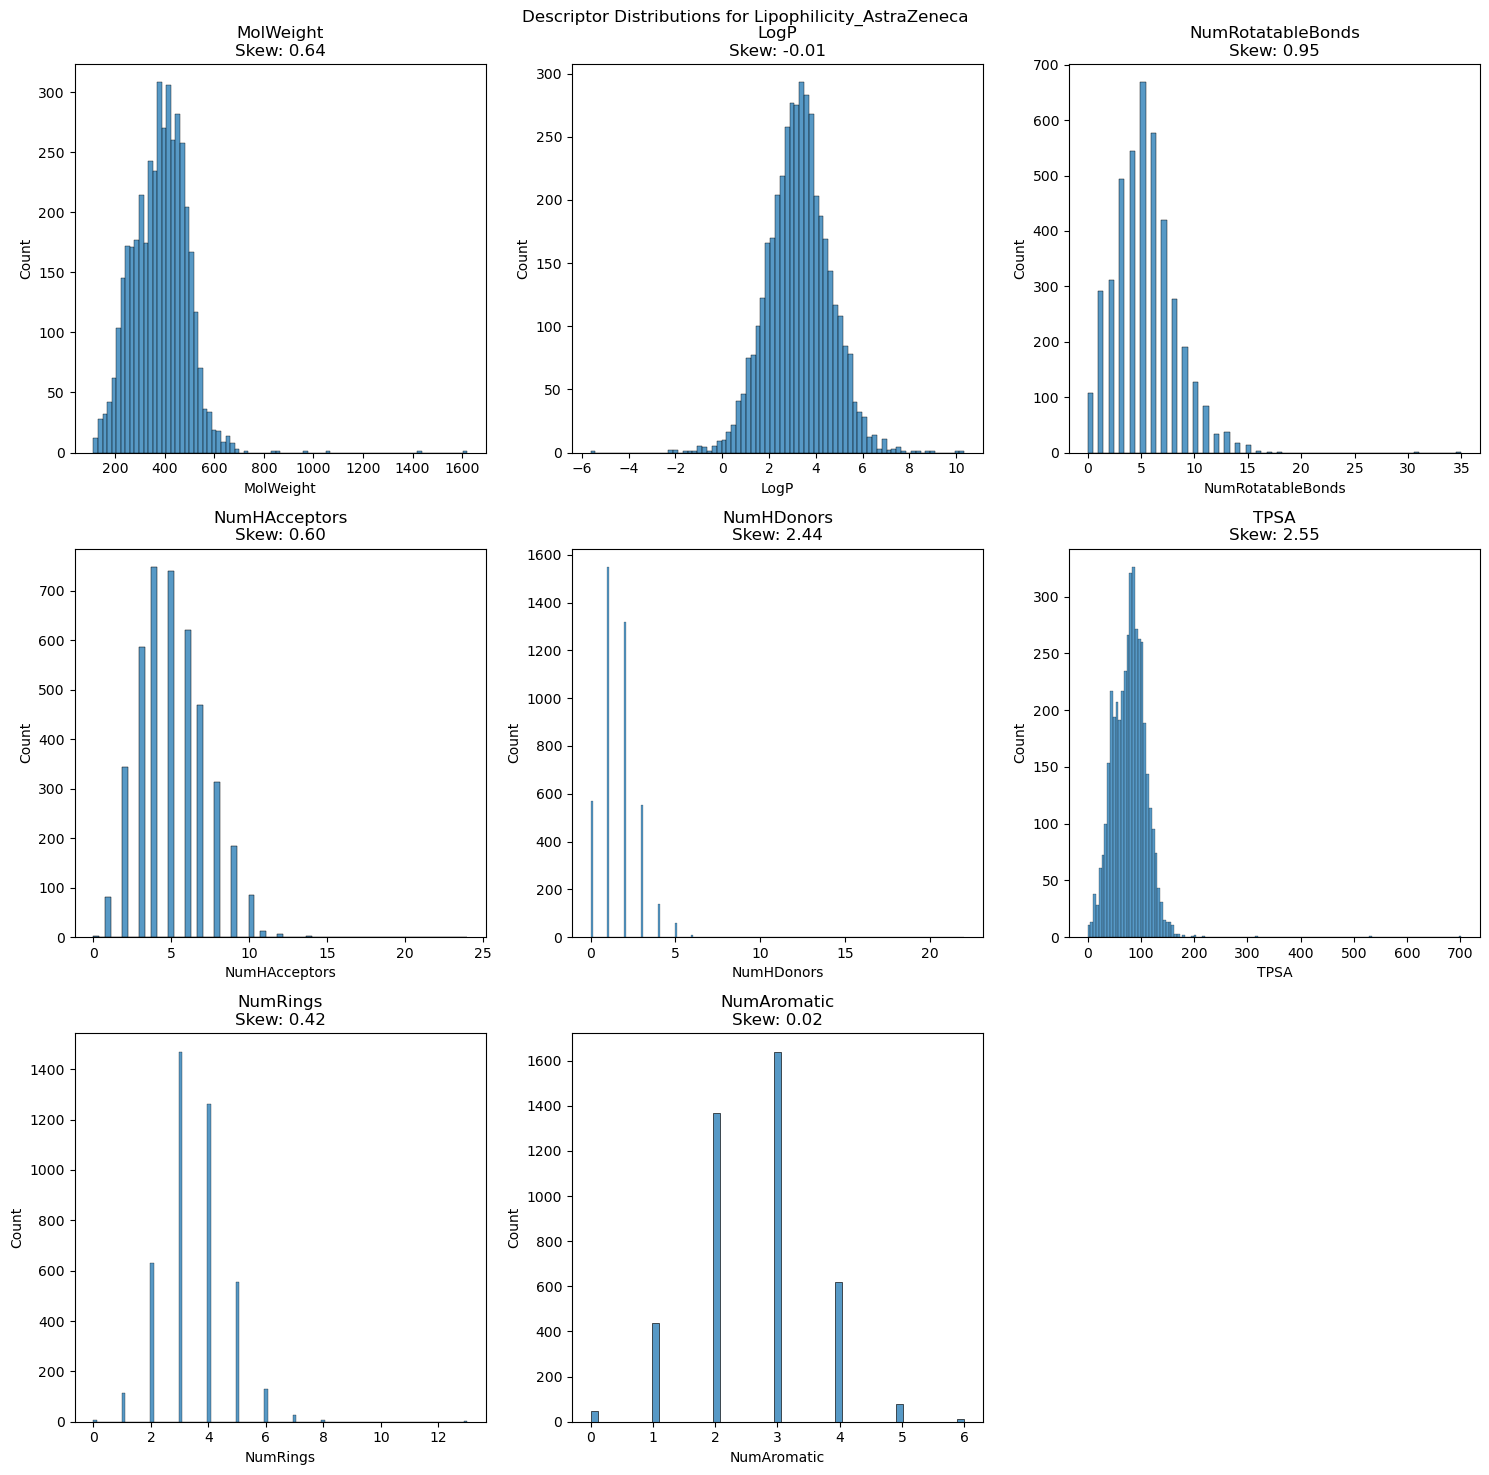


Analyzing descriptors for Solubility_AqSolDB

MolWeight statistics:
count    9982.000000
mean      266.234757
std       183.906166
min         9.012182
25%       162.093330
50%       228.172545
75%       320.024684
max      5295.754060
Name: MolWeight, dtype: float64

LogP statistics:
count    9982.000000
mean        1.979940
std         3.518775
min       -40.873200
25%         0.619750
50%         1.949220
75%         3.422840
max        68.541140
Name: LogP, dtype: float64

NumRotatableBonds statistics:
count    9982.000000
mean        4.073031
std         5.646925
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       141.000000
Name: NumRotatableBonds, dtype: float64

NumHAcceptors statistics:
count    9982.000000
mean        3.485674
std         3.497597
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        86.000000
Name: NumHAcceptors, dtype: float64

NumHDonors statistics:
count    9982.000000
mea

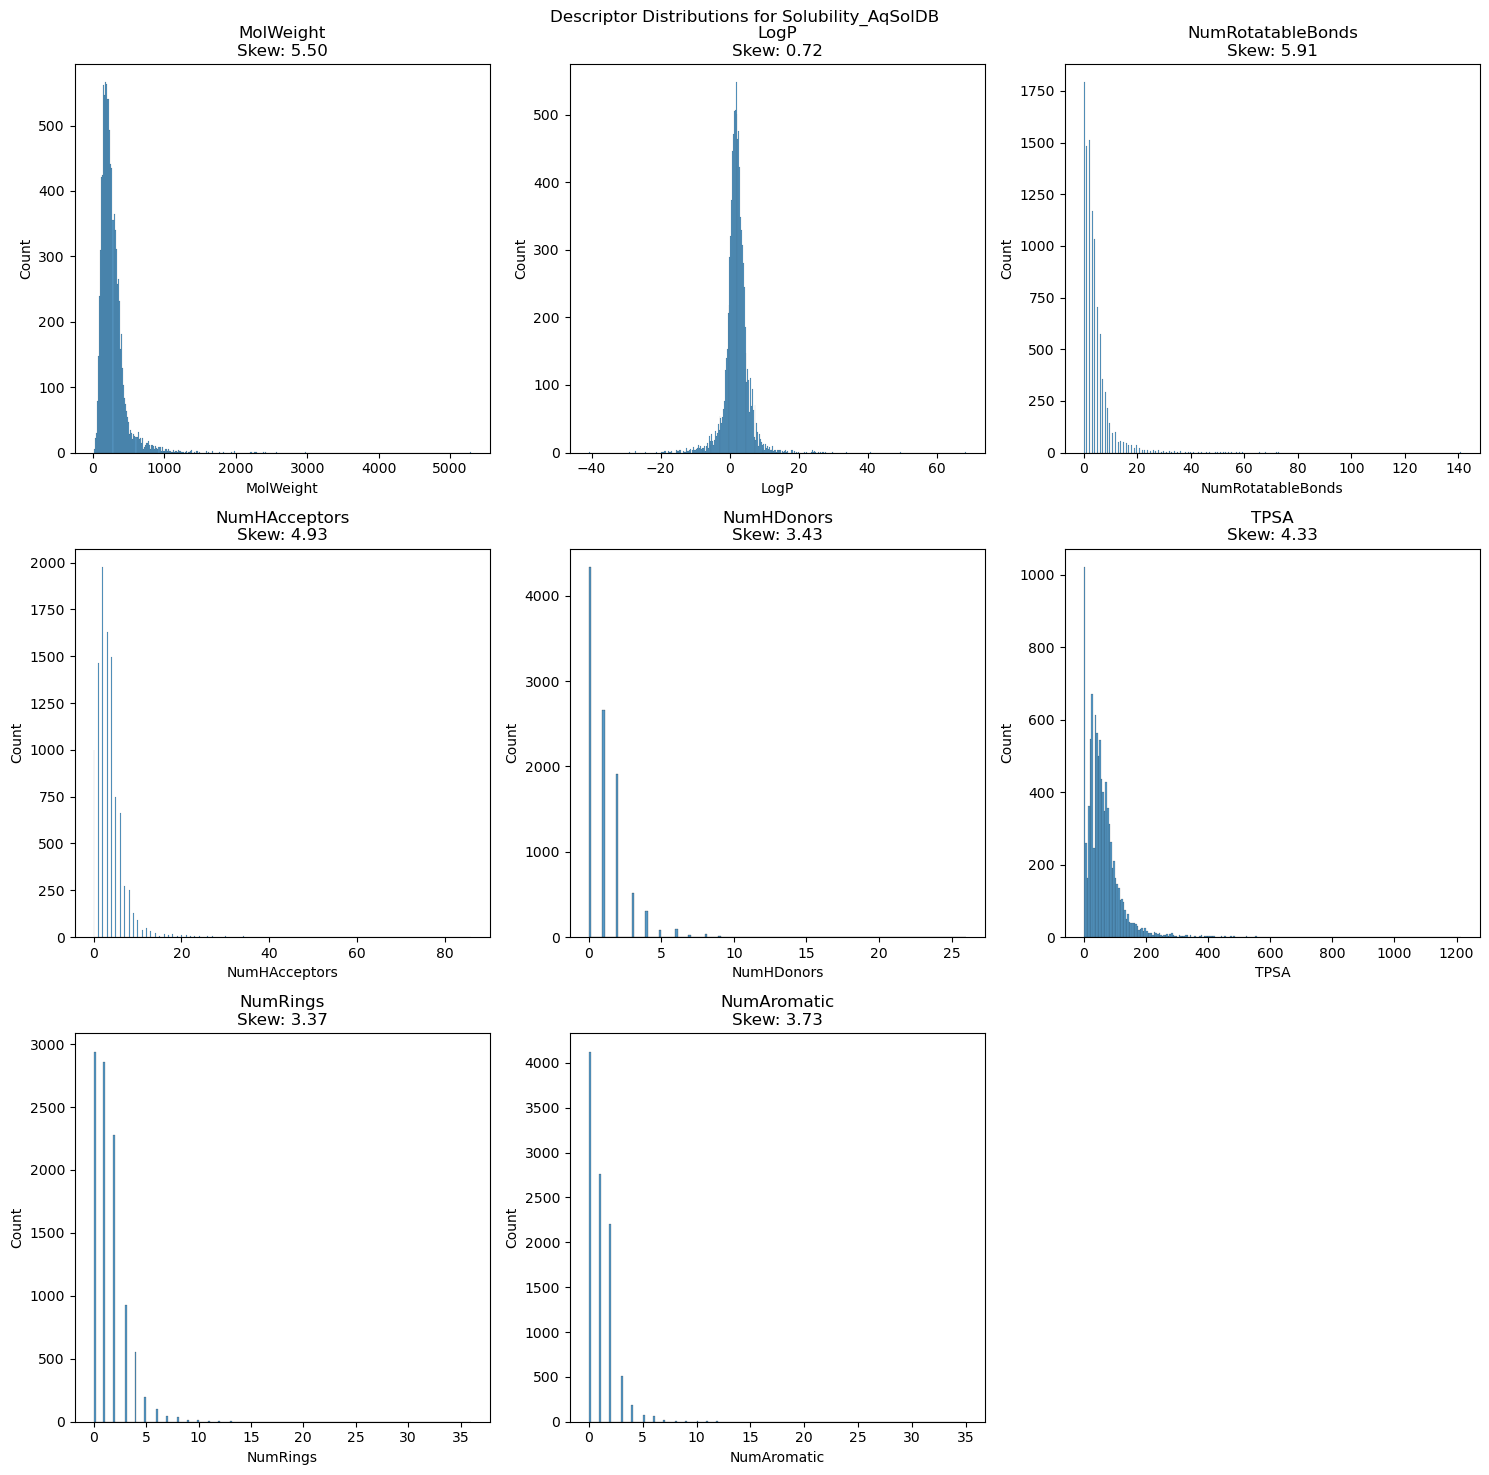


Analyzing descriptor correlations...

Analyzing descriptor correlations for Caco2_Wang


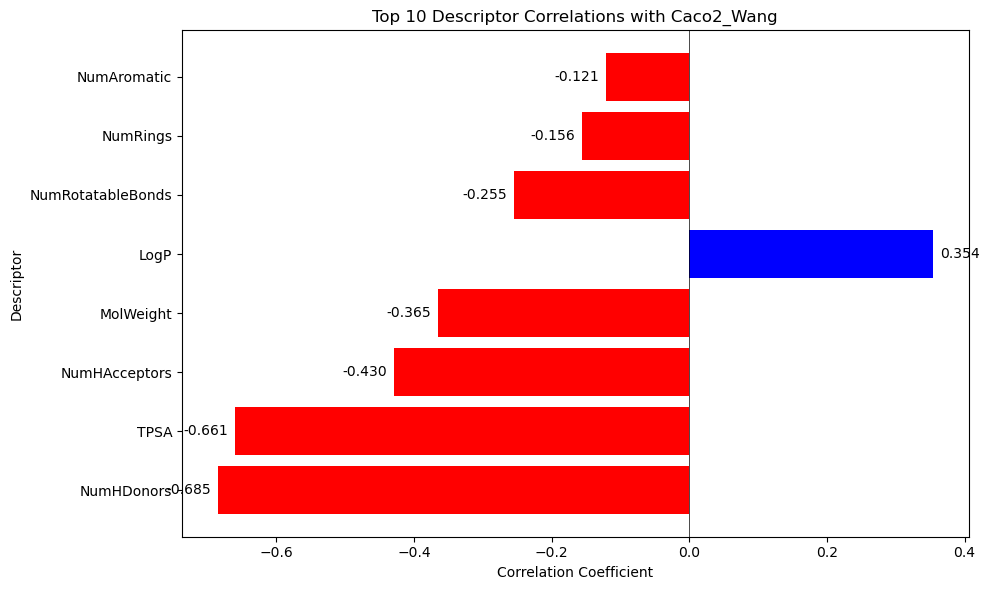


Top correlations:
          Descriptor  Correlation  Abs_Correlation
4         NumHDonors    -0.685497         0.685497
5               TPSA    -0.660735         0.660735
3      NumHAcceptors    -0.429574         0.429574
0          MolWeight    -0.364575         0.364575
1               LogP     0.353868         0.353868
2  NumRotatableBonds    -0.255313         0.255313
6           NumRings    -0.156239         0.156239
7        NumAromatic    -0.121043         0.121043

Analyzing descriptor correlations for HIA_Hou


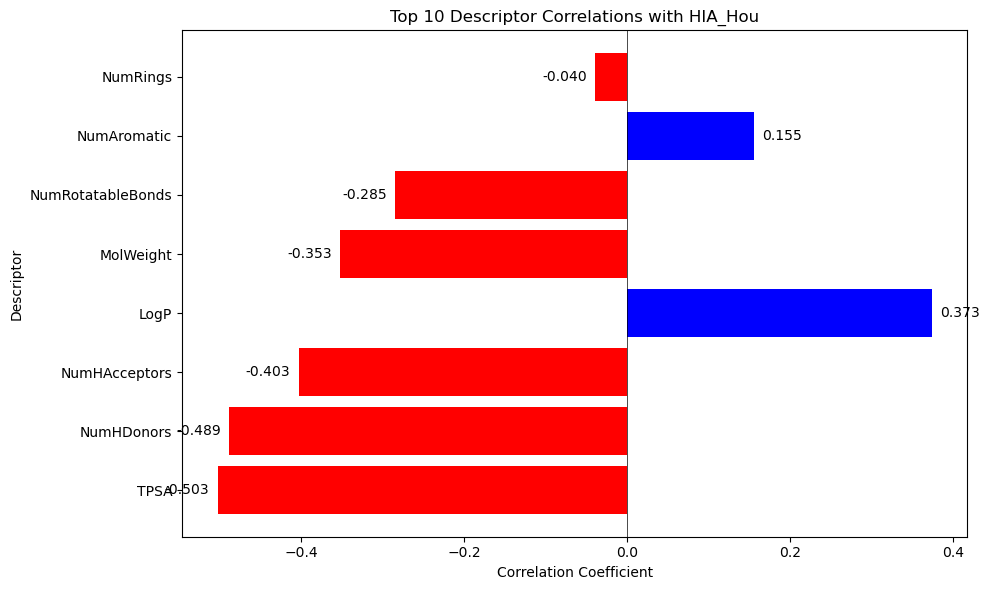


Top correlations:
          Descriptor  Correlation  Abs_Correlation
5               TPSA    -0.502947         0.502947
4         NumHDonors    -0.488823         0.488823
3      NumHAcceptors    -0.403395         0.403395
1               LogP     0.373416         0.373416
0          MolWeight    -0.352587         0.352587
2  NumRotatableBonds    -0.285153         0.285153
7        NumAromatic     0.154874         0.154874
6           NumRings    -0.039719         0.039719

Analyzing descriptor correlations for Bioavailability_Ma


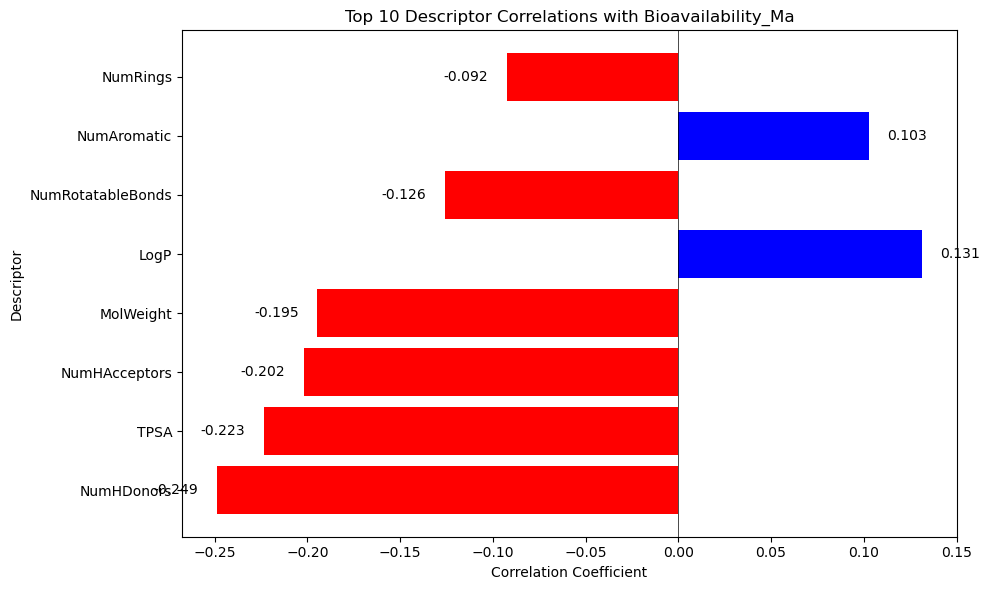


Top correlations:
          Descriptor  Correlation  Abs_Correlation
4         NumHDonors    -0.248685         0.248685
5               TPSA    -0.223327         0.223327
3      NumHAcceptors    -0.201853         0.201853
0          MolWeight    -0.194615         0.194615
1               LogP     0.131165         0.131165
2  NumRotatableBonds    -0.125783         0.125783
7        NumAromatic     0.102668         0.102668
6           NumRings    -0.092409         0.092409

Analyzing descriptor correlations for Lipophilicity_AstraZeneca


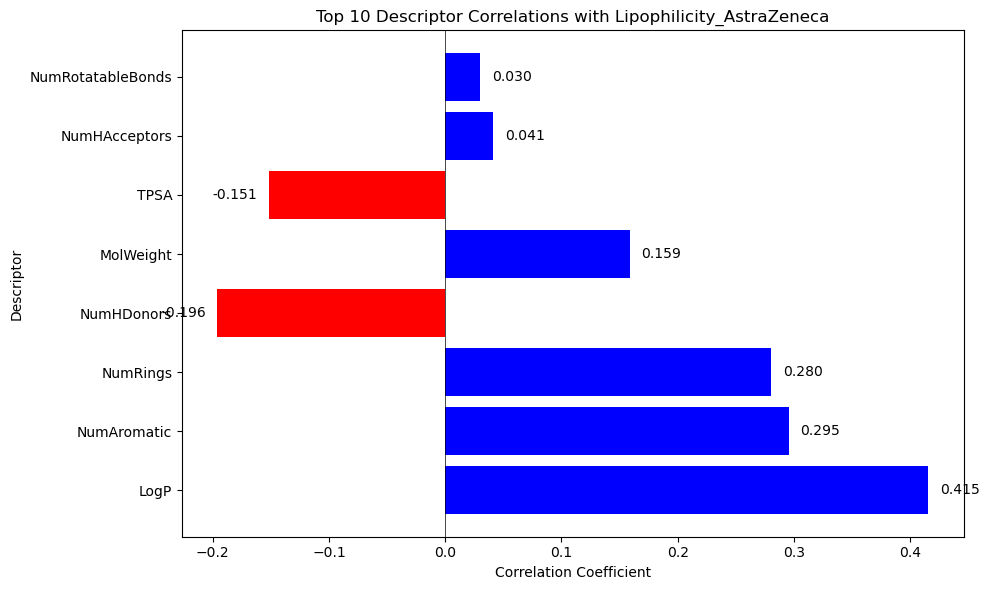


Top correlations:
          Descriptor  Correlation  Abs_Correlation
1               LogP     0.415450         0.415450
7        NumAromatic     0.295306         0.295306
6           NumRings     0.280276         0.280276
4         NumHDonors    -0.195873         0.195873
0          MolWeight     0.158770         0.158770
5               TPSA    -0.151483         0.151483
3      NumHAcceptors     0.041302         0.041302
2  NumRotatableBonds     0.030029         0.030029

Analyzing descriptor correlations for Solubility_AqSolDB


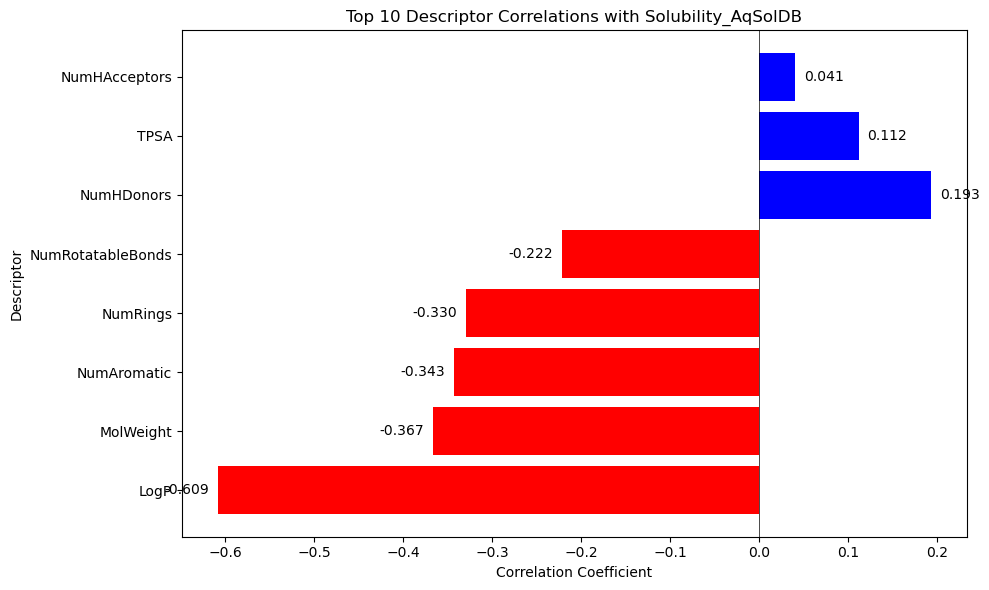


Top correlations:
          Descriptor  Correlation  Abs_Correlation
1               LogP    -0.608801         0.608801
0          MolWeight    -0.367035         0.367035
7        NumAromatic    -0.343402         0.343402
6           NumRings    -0.329580         0.329580
2  NumRotatableBonds    -0.222040         0.222040
4         NumHDonors     0.193066         0.193066
5               TPSA     0.111764         0.111764
3      NumHAcceptors     0.040662         0.040662

Plotting descriptor relationships...


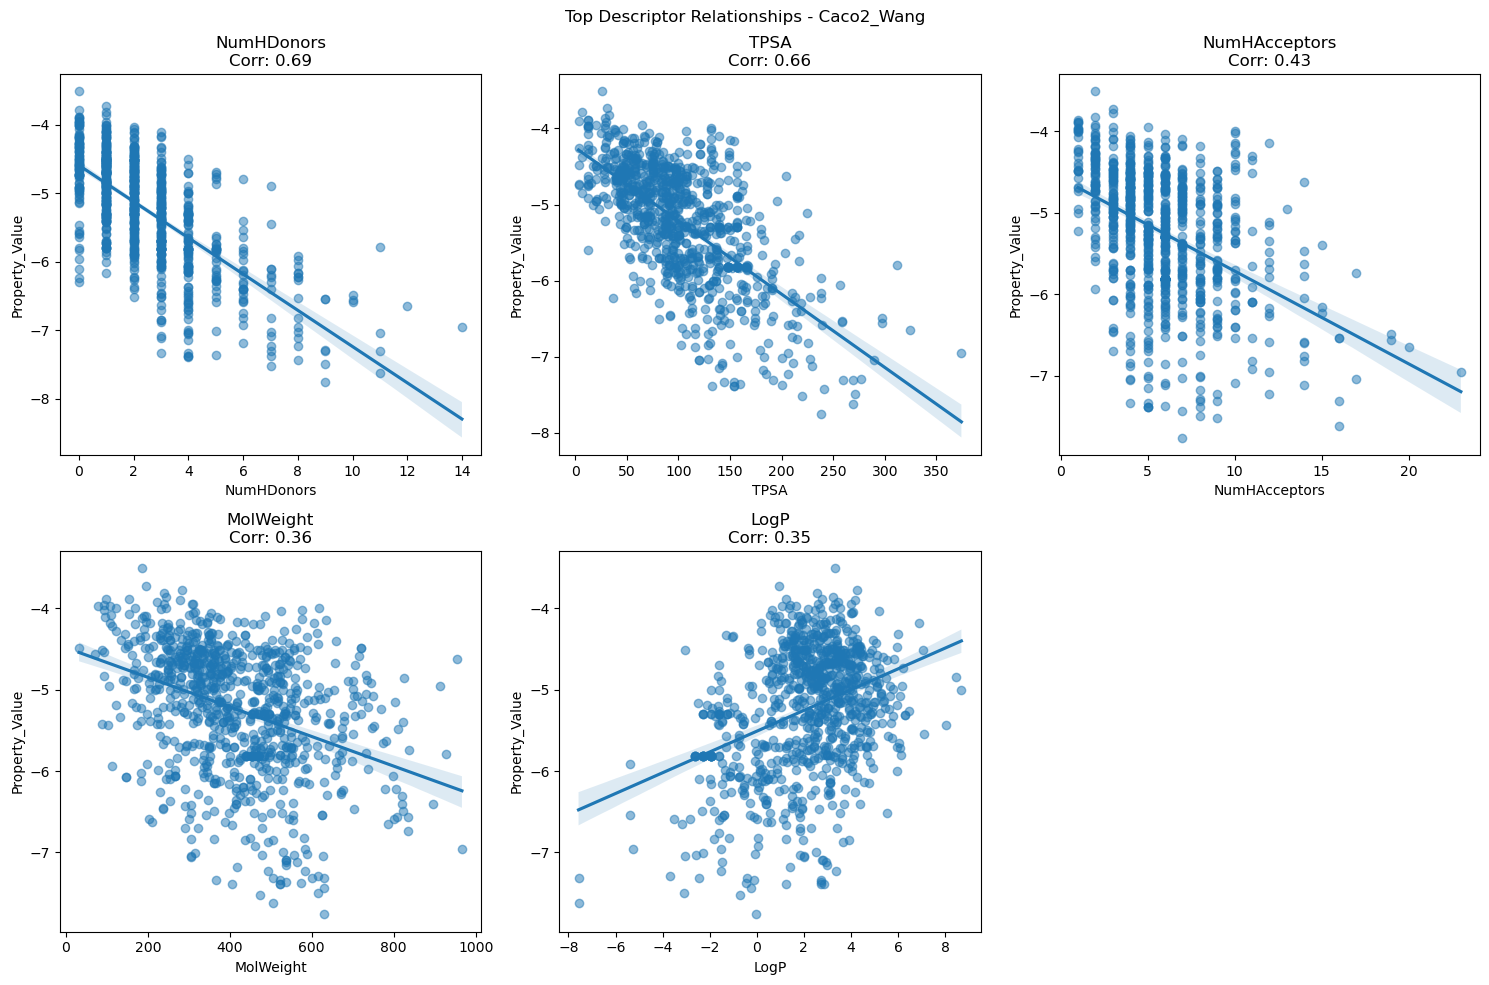

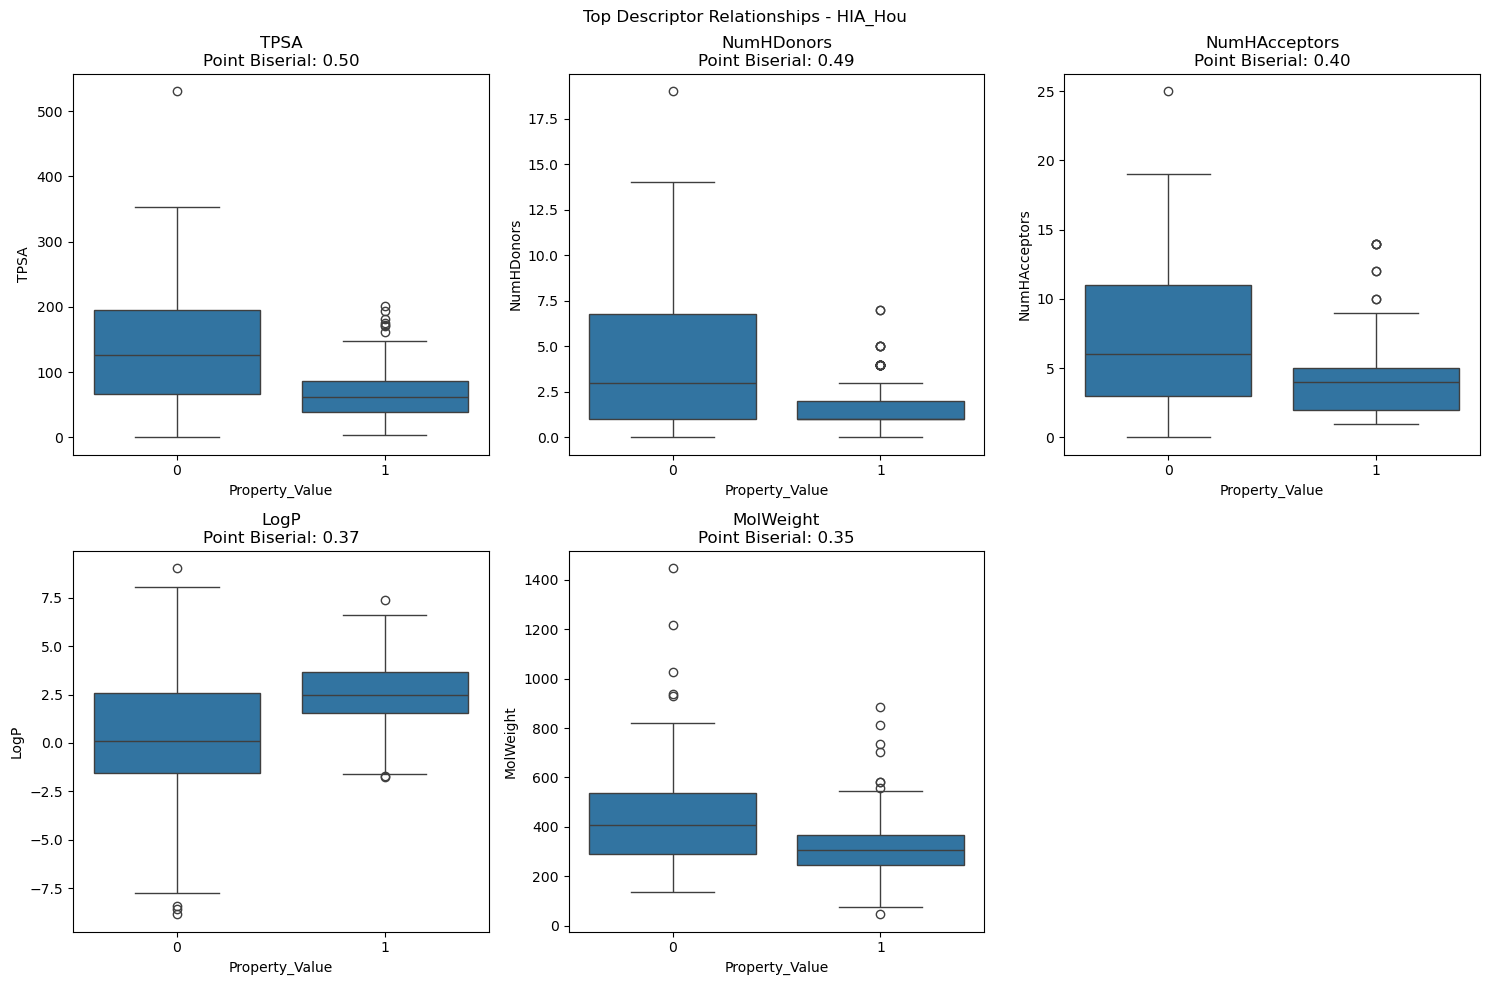

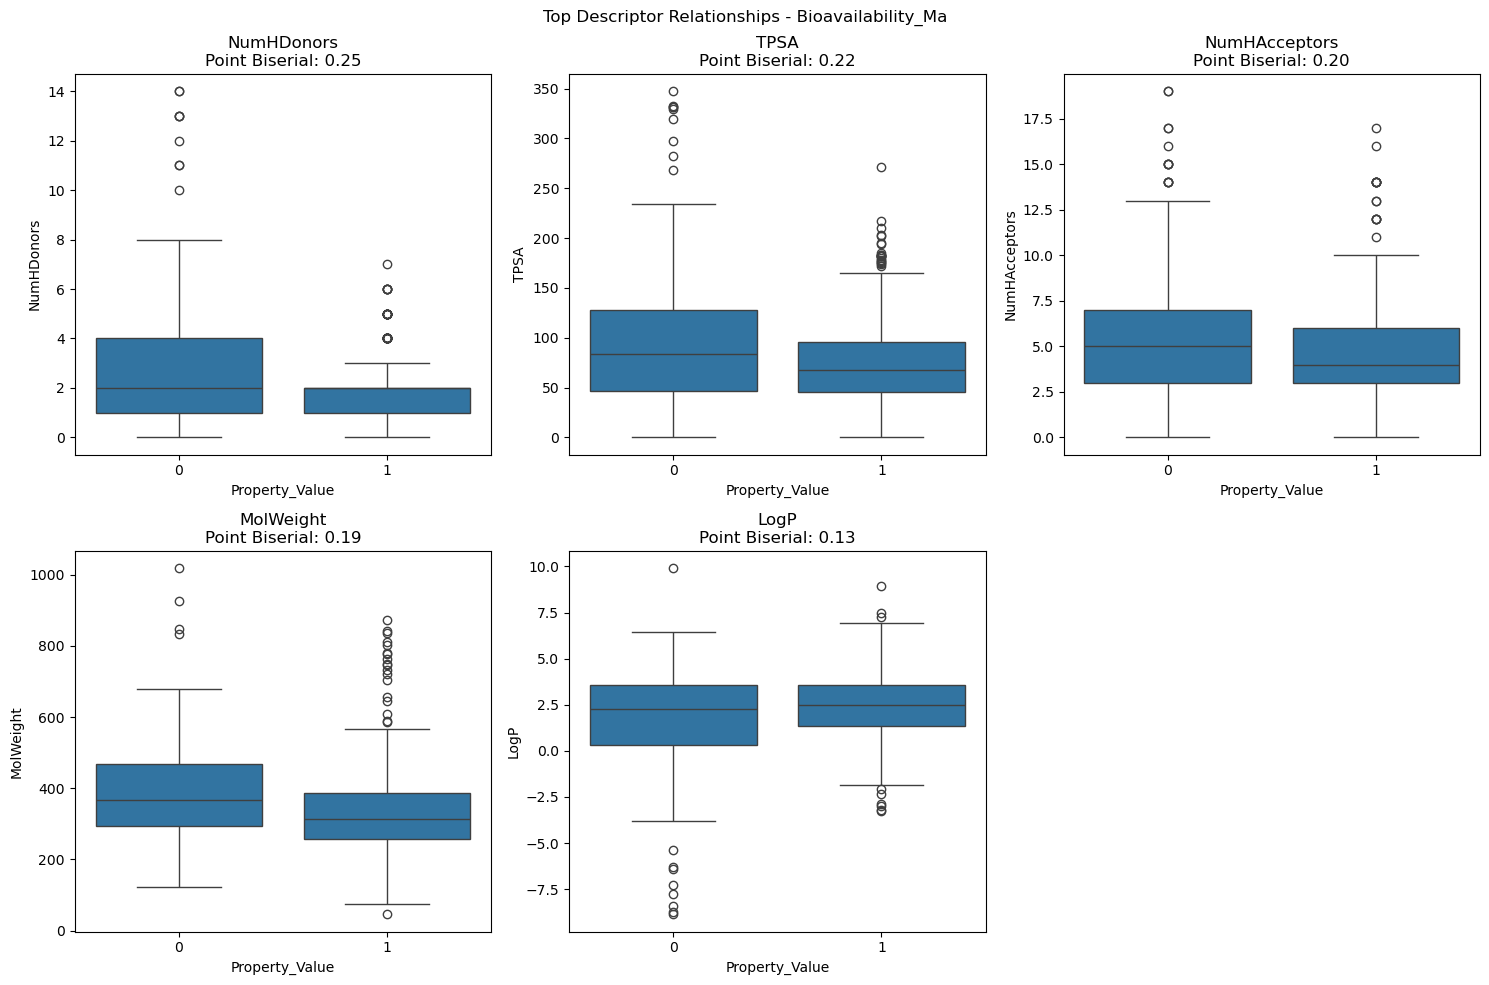

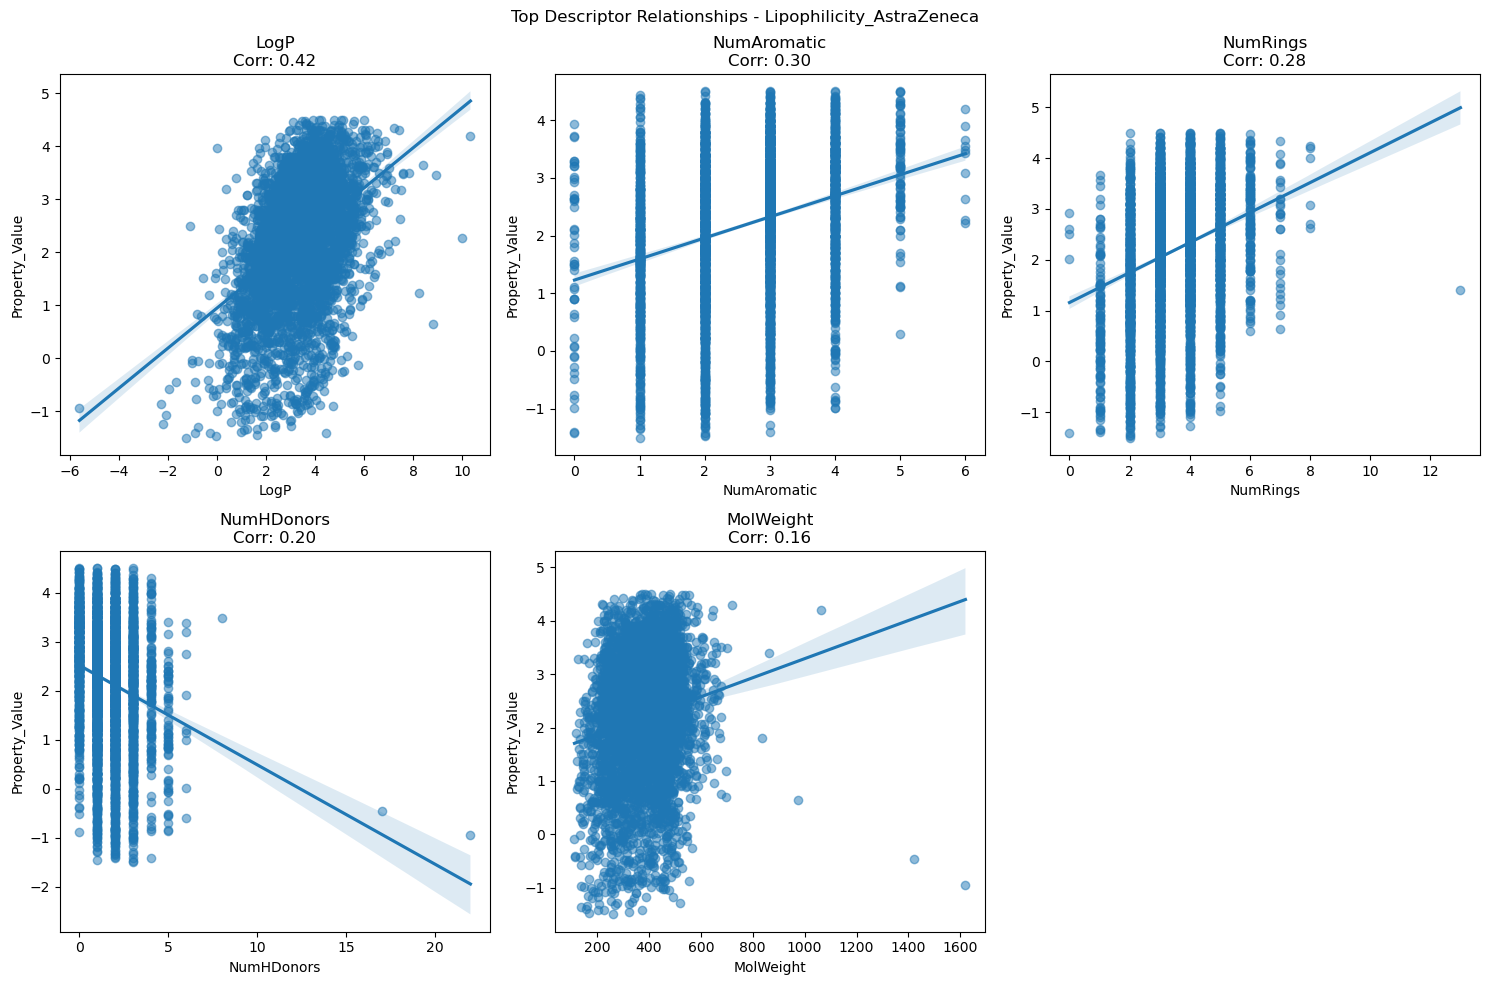

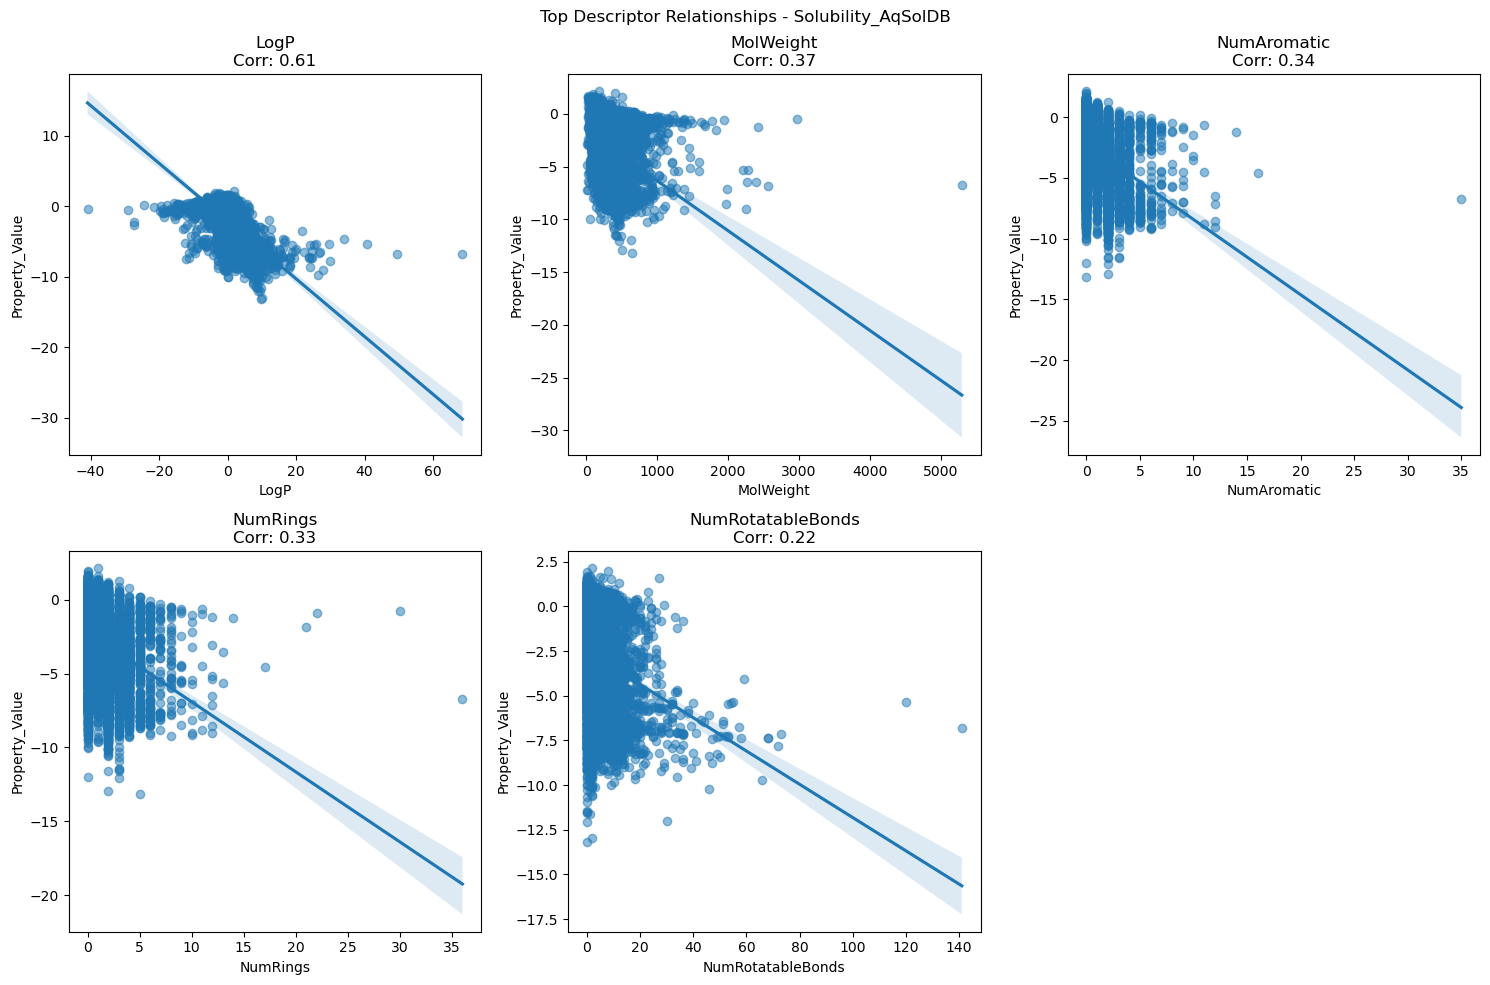


Analyzing outliers...

Analyzing outliers for Caco2_Wang


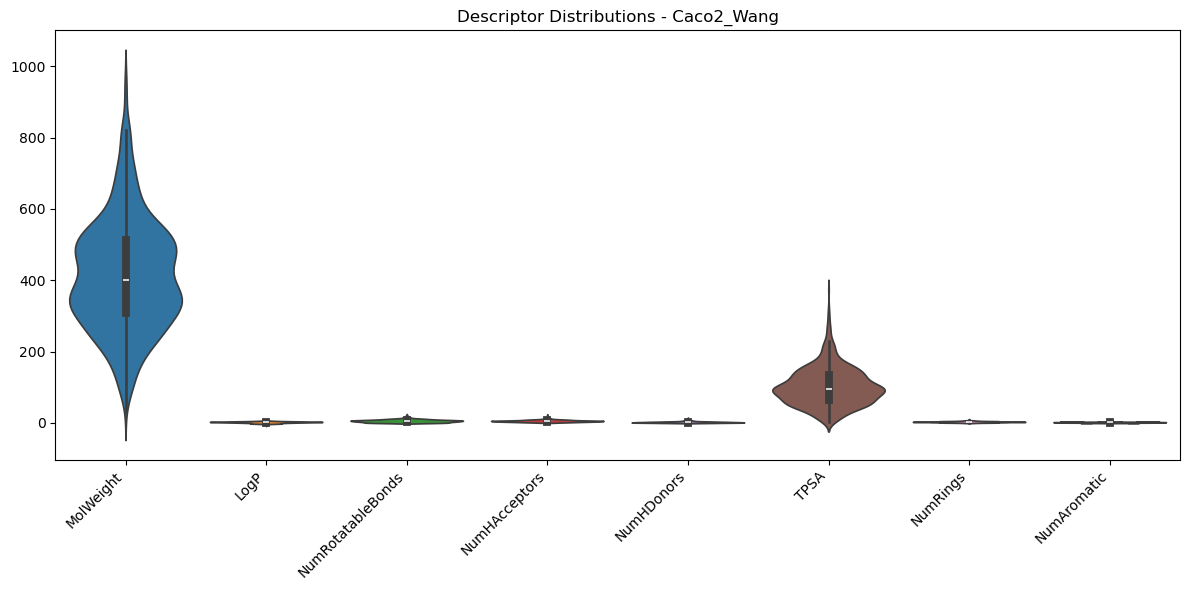


Outliers summary:
          Descriptor  Outliers_Count  Outliers_Percentage
0          MolWeight               9             0.989011
1               LogP              15             1.648352
2  NumRotatableBonds              22             2.417582
3      NumHAcceptors              38             4.175824
4         NumHDonors              45             4.945055
5               TPSA              20             2.197802
6           NumRings               6             0.659341
7        NumAromatic               0             0.000000

Skipping outlier analysis for HIA_Hou (classification task)

Skipping outlier analysis for Bioavailability_Ma (classification task)

Analyzing outliers for Lipophilicity_AstraZeneca


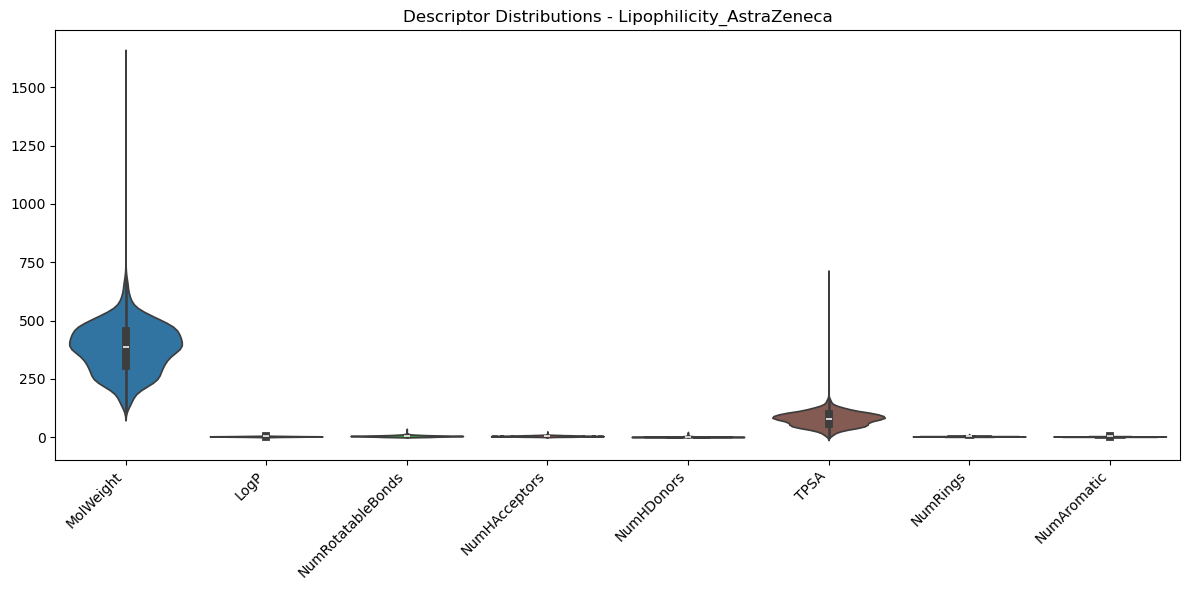


Outliers summary:
          Descriptor  Outliers_Count  Outliers_Percentage
0          MolWeight              10             0.238095
1               LogP              56             1.333333
2  NumRotatableBonds              38             0.904762
3      NumHAcceptors              12             0.285714
4         NumHDonors             210             5.000000
5               TPSA              15             0.357143
6           NumRings             283             6.738095
7        NumAromatic             137             3.261905

Analyzing outliers for Solubility_AqSolDB


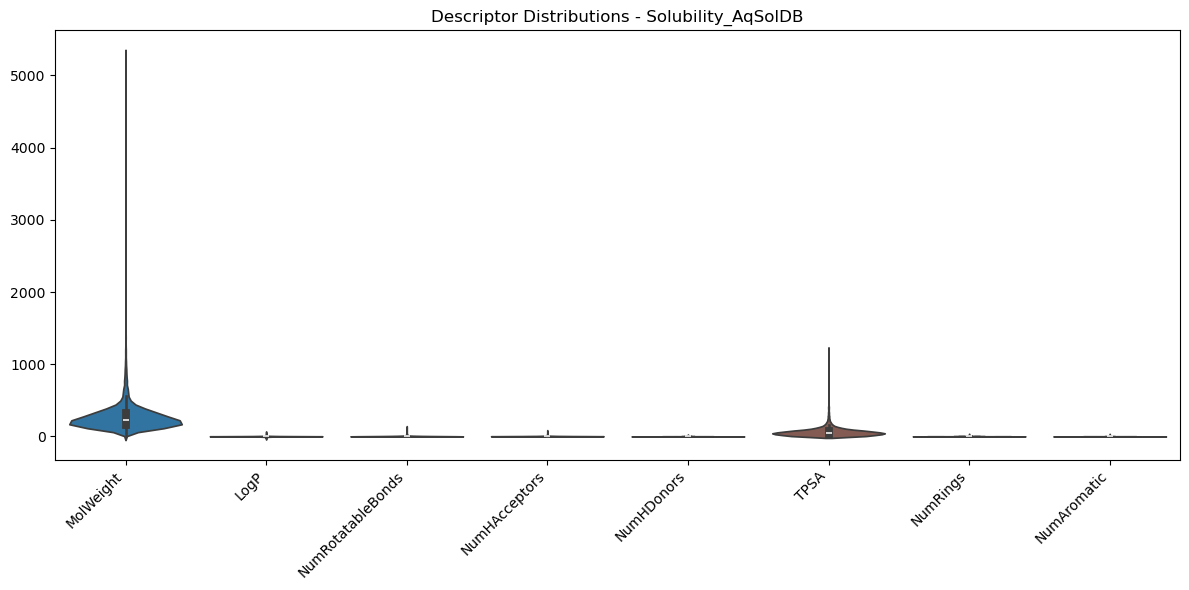


Outliers summary:
          Descriptor  Outliers_Count  Outliers_Percentage
0          MolWeight             488             4.888800
1               LogP             699             7.002605
2  NumRotatableBonds             609             6.100982
3      NumHAcceptors             748             7.493488
4         NumHDonors             188             1.883390
5               TPSA             472             4.728511
6           NumRings             223             2.234021
7        NumAromatic             114             1.142056


In [2]:
preprocessor = DrugDataPreprocessor()
processed_data = preprocessor.preprocess_all_data()

# Run analysis
analyze_data(processed_data)

# DrugDescriptorOutlierCleaner Documentation

## Overview
The `DrugDescriptorOutlierCleaner` class provides automated outlier detection and removal for drug descriptor data, specifically handling both classification and regression tasks differently.

## Key Features

### Task Type Handling
- Automatically identifies task types
- Skips outlier removal for classification tasks
- Applies IQR method only to regression tasks

### Outlier Detection
- Uses IQR method for each descriptor
- Configurable IQR multiplier
- Handles each descriptor independently
- Preserves rows only if all descriptors are within bounds

### Progress Tracking
- Prints detailed progress information
- Reports statistics for each property
- Shows outlier counts per descriptor
- Calculates removal percentages

## Best Practices

1. **Data Preparation**
   - Ensure 'SMILES' and 'Property_Value' columns exist
   - Verify data types are correct
   - Handle missing values before cleaning

2. **Parameter Selection**
   - Default IQR multiplier (1.5) is standard
   - Adjust based on domain knowledge
   - Consider impact on sample size

3. **Result Verification**
   - Check removal percentages
   - Verify task type identification
   - Review descriptor-specific outlier counts

## Error Handling
- Prints clear progress messages
- Identifies task types automatically
- Preserves original data structure
- Maintains data integrity checks

## Technical Details
- Uses numpy for efficient operations
- Preserves DataFrame structure
- Handles both task types appropriately
- Maintains all original columns
- Provides comprehensive statistics

In [3]:
import pandas as pd
import numpy as np

class DrugDescriptorOutlierCleaner:
    def __init__(self, data_dict):
        """
        Initialize cleaner with dictionary of DataFrames
        data_dict: dictionary where keys are property names and values are DataFrames
        """
        self.data_dict = data_dict
        self.cleaned_data = {}
        self.task_types = self._identify_task_types()
        
    def _identify_task_types(self):
        """Identify if each property is classification or regression"""
        task_types = {}
        for name, df in self.data_dict.items():
            unique_values = df['Property_Value'].unique()
            is_classification = len(unique_values) <= 2 and all(val in [0, 1] for val in unique_values)
            task_types[name] = 'classification' if is_classification else 'regression'
        return task_types
        
    def remove_outliers(self, iqr_multiplier=1.5):
        """
        Remove outliers from regression tasks only using IQR method
        iqr_multiplier: multiplier for IQR to determine outlier bounds (default 1.5)
        """
        print("Starting outlier removal. Properties:", list(self.data_dict.keys()))
        print("Task types:", self.task_types)
        for property_name, df in self.data_dict.items():
            print(f"\nProcessing property: {property_name}")
            print(f"DataFrame shape: {df.shape}")
            # Skip classification tasks
            if self.task_types[property_name] == 'classification':
                print(f"\nSkipping outlier removal for {property_name} (classification task)")
                self.cleaned_data[property_name] = {
                    'data': df.copy(),
                    'stats': {
                        'original_rows': len(df),
                        'rows_removed': 0,
                        'rows_remaining': len(df),
                        'removal_percentage': 0.0
                    }
                }
                continue
                
            print(f"\nProcessing outlier removal for {property_name} (regression task)")
            
            # Create copy of DataFrame
            clean_df = df.copy()
            
            # Get descriptor columns (excluding SMILES, Property_Value, and Morgan fingerprints)
            descriptor_columns = [col for col in df.columns 
                                if col not in ['SMILES', 'Property_Value'] 
                                and not col.startswith('Morgan_')]
            
            # Track rows to keep
            rows_to_keep = np.ones(len(df), dtype=bool)
            
            # Store outlier information for each descriptor
            descriptor_outliers = {}
            
            # Check each descriptor for outliers
            for column in descriptor_columns:
                Q1 = df[column].quantile(0.25)
                Q3 = df[column].quantile(0.75)
                IQR = Q3 - Q1
                
                lower_bound = Q1 - iqr_multiplier * IQR
                upper_bound = Q3 + iqr_multiplier * IQR
                
                # Identify outliers for this descriptor
                column_outliers = df[
                    (df[column] < lower_bound) | 
                    (df[column] > upper_bound)
                ]
                
                descriptor_outliers[column] = len(column_outliers)
                
                # Update rows to keep
                column_valid = (df[column] >= lower_bound) & (df[column] <= upper_bound)
                rows_to_keep = rows_to_keep & column_valid
            
            # Keep only non-outlier rows
            clean_df = clean_df[rows_to_keep]
            
            # Store statistics
            stats = {
                'original_rows': len(df),
                'rows_removed': len(df) - len(clean_df),
                'rows_remaining': len(clean_df),
                'removal_percentage': ((len(df) - len(clean_df)) / len(df) * 100),
                'descriptor_outliers': descriptor_outliers
            }
            
            # Store cleaned DataFrame and stats
            self.cleaned_data[property_name] = {
                'data': clean_df,
                'stats': stats
            }
            
            # Print detailed summary
            print(f"\nOutlier removal summary for {property_name}:")
            print(f"Original rows: {stats['original_rows']}")
            print(f"Rows removed: {stats['rows_removed']}")
            print(f"Rows remaining: {stats['rows_remaining']}")
            print(f"Removal percentage: {stats['removal_percentage']:.2f}%")
            
            print("\nOutliers per descriptor:")
            for descriptor, count in descriptor_outliers.items():
                print(f"{descriptor}: {count} outliers ({count/len(df)*100:.2f}%)")
        
        return self.cleaned_data

    def get_cleaned_data(self):
        """Return dictionary of cleaned DataFrames only"""
        return {k: v['data'] for k, v in self.cleaned_data.items()}

    def get_cleaning_stats(self):
        """Return cleaning statistics for all properties"""
        return {k: v['stats'] for k, v in self.cleaned_data.items()}

def clean_outliers(processed_data, iqr_multiplier=1.5):
    print("Properties in processed_data:", list(processed_data.keys()))
    cleaner = DrugDescriptorOutlierCleaner(processed_data)
    print("\nTask types identified:", cleaner.task_types)
    results = cleaner.remove_outliers(iqr_multiplier=iqr_multiplier)
    final_data = cleaner.get_cleaned_data()
    print("\nProperties in cleaned data:", list(final_data.keys()))
    return final_data

In [4]:
cleaned_data = clean_outliers(processed_data)
analyzer = DrugDescriptorAnalyzer(cleaned_data)

Properties in processed_data: ['Caco2_Wang', 'HIA_Hou', 'Bioavailability_Ma', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']

Task types identified: {'Caco2_Wang': 'regression', 'HIA_Hou': 'classification', 'Bioavailability_Ma': 'classification', 'Lipophilicity_AstraZeneca': 'regression', 'Solubility_AqSolDB': 'regression'}
Starting outlier removal. Properties: ['Caco2_Wang', 'HIA_Hou', 'Bioavailability_Ma', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
Task types: {'Caco2_Wang': 'regression', 'HIA_Hou': 'classification', 'Bioavailability_Ma': 'classification', 'Lipophilicity_AstraZeneca': 'regression', 'Solubility_AqSolDB': 'regression'}

Processing property: Caco2_Wang
DataFrame shape: (910, 1034)

Processing outlier removal for Caco2_Wang (regression task)

Outlier removal summary for Caco2_Wang:
Original rows: 910
Rows removed: 80
Rows remaining: 830
Removal percentage: 8.79%

Outliers per descriptor:
MolWeight: 9 outliers (0.99%)
LogP: 15 outliers (1.65%)
NumRotatableBond

In [ ]:
# Store cleamed data

import pickle

# Save data
with open('cleaned_drug_data.pkl', 'wb') as f:
    pickle.dump(cleaned_data, f)

# Load data
with open('cleaned_drug_data.pkl', 'rb') as f:
    cleaned_data = pickle.load(f)